In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [6]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
students_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
students_performance.head(3)

gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93

In [19]:
students_performance.iloc[::, [0, 2, 5]]

gender parental level of education  math score
0    female           bachelor's degree          72
1    female                some college          69
2    female             master's degree          90
3      male          associate's degree          47
4      male                some college          76
..      ...                         ...         ...
995  female             master's degree          88
996    male                 high school          62
997  female                 high school          59
998  female                some college          68
999  female                some college          77

[1000 rows x 3 columns]

In [20]:
students_performance.iloc[:3]

gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93

In [21]:
students_performance.loc[:3]

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44

У какой доли студентов из датасэта в колонке lunch указано free/reduced?
Формат ответа десятичная дробь, например, 0.25

In [41]:
students_performance.groupby('lunch')['lunch'].count()/students_performance.shape[0]

lunch
free/reduced    0.355
standard        0.645
Name: lunch, dtype: float64

In [42]:
students_performance['lunch'].value_counts(normalize=True)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

In [44]:
students_performance.groupby('lunch')['math score', 'reading score', 'writing score'].describe().T

/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_45118/957298985.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  students_performance.groupby('lunch')['math score', 'reading score', 'writing score'].describe().T


lunch                free/reduced    standard
math score    count    355.000000  645.000000
              mean      58.921127   70.034109
              std       15.159956   13.653501
              min        0.000000   19.000000
              25%       49.000000   61.000000
              50%       60.000000   69.000000
              75%       69.000000   80.000000
              max      100.000000  100.000000
reading score count    355.000000  645.000000
              mean      64.653521   71.654264
              std       14.895339   13.830602
              min       17.000000   26.000000
              25%       56.000000   63.000000
              50%       65.000000   72.000000
              75%       75.000000   82.000000
              max      100.000000  100.000000
writing score count    355.000000  645.000000
              mean      63.022535   70.823256
              std       15.433823   14.339487
              min       10.000000   22.000000
              25%       53.000000   62.000000
              50%       64.000000   72.000000
              75%       74.000000   81.000000
              max      100.000000  100.000000

In [46]:
students_performance.groupby('lunch').describe().T

lunch                free/reduced    standard
math score    count    355.000000  645.000000
              mean      58.921127   70.034109
              std       15.159956   13.653501
              min        0.000000   19.000000
              25%       49.000000   61.000000
              50%       60.000000   69.000000
              75%       69.000000   80.000000
              max      100.000000  100.000000
reading score count    355.000000  645.000000
              mean      64.653521   71.654264
              std       14.895339   13.830602
              min       17.000000   26.000000
              25%       56.000000   63.000000
              50%       65.000000   72.000000
              75%       75.000000   82.000000
              max      100.000000  100.000000
writing score count    355.000000  645.000000
              mean      63.022535   70.823256
              std       15.433823   14.339487
              min       10.000000   22.000000
              25%       53.000000   62.000000
              50%       64.000000   72.000000
              75%       74.000000   81.000000
              max      100.000000  100.000000

In [47]:
students_performance.groupby('lunch').agg([np.mean, np.var]).T

/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_45118/3863021578.py:1: FutureWarning: ['gender', 'race/ethnicity', 'parental level of education', 'test preparation course'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  students_performance.groupby('lunch').agg([np.mean, np.var]).T


lunch               free/reduced    standard
math score    mean     58.921127   70.034109
              var     229.824270  186.418089
reading score mean     64.653521   71.654264
              var     221.871139  191.285560
writing score mean     63.022535   70.823256
              var     238.202881  205.620887

In [48]:
student_stats = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
student_stats.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [49]:
students_performance = students_performance.rename(columns=lambda col: col.replace(" ", "_"))
students_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [64]:
students_performance.query('reading_score > 90 & gender == "female" & lunch == "standard"')

gender race/ethnicity parental_level_of_education     lunch  \
2    female        group B             master's degree  standard   
6    female        group B                some college  standard   
102  female        group D          associate's degree  standard   
106  female        group D             master's degree  standard   
114  female        group E           bachelor's degree  standard   
120  female        group C           bachelor's degree  standard   
122  female        group C                some college  standard   
125  female        group B                 high school  standard   
164  female        group E             master's degree  standard   
165  female        group C           bachelor's degree  standard   
175  female        group C             master's degree  standard   
179  female        group D            some high school  standard   
229  female        group C                some college  standard   
263  female        group E                 high school  standard   
268  female        group D          associate's degree  standard   
276  female        group C            some high school  standard   
334  female        group C           bachelor's degree  standard   
347  female        group C           bachelor's degree  standard   
373  female        group D                some college  standard   
403  female        group D                 high school  standard   
451  female        group E                some college  standard   
458  female        group E           bachelor's degree  standard   
509  female        group C           bachelor's degree  standard   
543  female        group D          associate's degree  standard   
546  female        group A            some high school  standard   
577  female        group B                 high school  standard   
580  female        group D            some high school  standard   
594  female        group C           bachelor's degree  standard   
614  female        group A          associate's degree  standard   
637  female        group D            some high school  standard   
685  female        group E             master's degree  standard   
712  female        group D                some college  standard   
717  female        group C          associate's degree  standard   
755  female        group E          associate's degree  standard   
802  female        group E          associate's degree  standard   
819  female        group C            some high school  standard   
855  female        group B           bachelor's degree  standard   
886  female        group E          associate's degree  standard   
891  female        group E          associate's degree  standard   
941  female        group D             master's degree  standard   
957  female        group D             master's degree  standard   
962  female        group E          associate's degree  standard   
970  female        group D           bachelor's degree  standard   
979  female        group C          associate's degree  standard   
995  female        group E             master's degree  standard   

    test_preparation_course  math_score  reading_score  writing_score  
2                      none          90             95             93  
6                 completed          88             95             92  
102                    none          85             91             89  
106                    none          87            100            100  
114               completed          99            100            100  
120               completed          79             92             89  
122               completed          88             93             93  
125                    none          87             95             86  
164                    none          81             92             91  
165               completed          96            100            100  
175               completed          81             91             87  
179         

In [67]:
score_filter = [i for i in students_performance.columns if 'score' in i]
score_filter

['math_score', 'reading_score', 'writing_score']

In [68]:
score_filter = [i for i in list(students_performance) if 'score' in i]
score_filter

['math_score', 'reading_score', 'writing_score']

In [69]:
students_performance.filter(like='score')

math_score  reading_score  writing_score
0            72             72             74
1            69             90             88
2            90             95             93
3            47             57             44
4            76             78             75
..          ...            ...            ...
995          88             99             95
996          62             55             55
997          59             71             65
998          68             78             77
999          77             86             86

[1000 rows x 3 columns]

In [71]:
students_performance.filter(like='10', axis=0)

gender race/ethnicity parental_level_of_education         lunch  \
10     male        group C          associate's degree      standard   
100    male        group B                some college      standard   
101    male        group D           bachelor's degree      standard   
102  female        group D          associate's degree      standard   
103    male        group B                 high school      standard   
104    male        group C                some college      standard   
105  female        group C                some college      standard   
106  female        group D             master's degree      standard   
107    male        group E          associate's degree      standard   
108  female        group B          associate's degree  free/reduced   
109  female        group B            some high school      standard   
110  female        group D          associate's degree  free/reduced   
210    male        group D            some high school  free/reduced   
310  female        group B          associate's degree      standard   
410  female        group D             master's degree      standard   
510    male        group D                some college      standard   
610    male        group D                some college  free/reduced   
710    male        group C                some college      standard   
810    male        group A            some high school      standard   
910    male        group D           bachelor's degree  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
10                     none          58             54             52  
100                    none          79             67             67  
101               completed          68             74             74  
102                    none          85             91             89  
103               completed          60             44             47  
104               completed          98             86             90  
105                    none          58             67             72  
106                    none          87            100            100  
107               completed          66             63             64  
108                    none          52             76             70  
109                    none          70             64             72  
110               completed          77             89             98  
210               completed          80             79             79  
310                    none          73             76             80  
410               completed          70             71             74  
510                    none          76             71             73  
610               completed          69             60             63  
710               completed          93             84             90  
810                    none          51             31             36  
910                    none          50             42             48

In [78]:
students_performance.filter(regex='^ra.*')

race/ethnicity
0          group B
1          group C
2          group B
3          group A
4          group C
..             ...
995        group E
996        group C
997        group C
998        group D
999        group D

[1000 rows x 1 columns]

In [79]:
students_performance.filter(regex='.*e$')

test_preparation_course  math_score  reading_score  writing_score
0                      none          72             72             74
1                 completed          69             90             88
2                      none          90             95             93
3                      none          47             57             44
4                      none          76             78             75
..                      ...         ...            ...            ...
995               completed          88             99             95
996                    none          62             55             55
997               completed          59             71             65
998               completed          68             78             77
999                    none          77             86             86

[1000 rows x 4 columns]

In [101]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/column_hell.csv')
df.head()

yrh&6      ohku         q      hfxx   umeca-4       apj         g  \
0  0.288397  0.911359  0.488069  0.074599  0.016124  0.090555  0.560810   
1  0.861276  0.134987  0.701885  0.897921  0.507115  0.740151  0.963179   
2  0.775577  0.832874  0.862665  0.831049  0.003274  0.703112  0.509795   
3  0.857910  0.555818  0.598305  0.473988  0.784139  0.427963  0.725103   
4  0.748652  0.451725  0.252619  0.584361  0.011265  0.051115  0.755444   

   ijvnixxo  kudbpyw-3    upubjv  ...        fi   clsruyy       g&6      qo$6  \
0  0.110975   0.430787  0.548763  ...  0.793122  0.070335  0.145115  0.686579   
1  0.712024   0.671662  0.497596  ...  0.477181  0.767931  0.996055  0.948774   
2  0.573296   0.286411  0.282792  ...  0.421542  0.770413  0.749468  0.395022   
3  0.286610   0.863717  0.545562  ...  0.240252  0.010355  0.759912  0.965837   
4  0.627191   0.206172  0.955043  ...  0.846165  0.043458  0.209347  0.028276   

         ap         o  sladymzr       tif   wuikzxt     wzuvc  
0  0.071681  0.563068  0.815201  0.081902  0.333237  0.185148  
1  0.054327  0.087341  0.072166  0.856081  0.120481  0.622113  
2  0.307752  0.535575  0.341393  0.971201  0.714558  0.702453  
3  0.110719  0.439488  0.816526  0.111621  0.373365  0.461615  
4  0.700446  0.203503  0.181903  0.428842  0.099398  0.175227  

[5 rows x 75 columns]

In [83]:
selected_columns = df.filter(like='-')
selected_columns

umeca-4  kudbpyw-3       g-3       v-9     fla-6  hwtbyrkp-5
0   0.016124   0.430787  0.202407  0.725508  0.305076    0.979296
1   0.507115   0.671662  0.864249  0.867818  0.358859    0.160520
2   0.003274   0.286411  0.928865  0.719159  0.340235    0.734612
3   0.784139   0.863717  0.175446  0.554744  0.049325    0.621132
4   0.011265   0.206172  0.044151  0.163643  0.048806    0.437836
..       ...        ...       ...       ...       ...         ...
95  0.220817   0.434444  0.601738  0.146333  0.918888    0.216499
96  0.474131   0.176011  0.359793  0.104707  0.257690    0.066934
97  0.091637   0.871606  0.121075  0.907699  0.313184    0.788592
98  0.360106   0.172385  0.015285  0.019571  0.060751    0.403166
99  0.669284   0.701505  0.481430  0.024944  0.644989    0.702003

[100 rows x 6 columns]

In [97]:
selected_columns = df.filter(regex='^[a-z]{5,7}-')
selected_columns

umeca-4  kudbpyw-3
0   0.016124   0.430787
1   0.507115   0.671662
2   0.003274   0.286411
3   0.784139   0.863717
4   0.011265   0.206172
..       ...        ...
95  0.220817   0.434444
96  0.474131   0.176011
97  0.091637   0.871606
98  0.360106   0.172385
99  0.669284   0.701505

[100 rows x 2 columns]

In [102]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv').rename(columns=lambda col: col.replace(" ", "_"))
df.head(3)

gender race/ethnicity parental_level_of_education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93

In [104]:
df_agg = df.groupby('gender').aggregate({'math_score': 'sum', 'reading_score': 'mean'}).\
    rename(columns={'math_score': 'math_score_sum', 'reading_score': 'reading_score_mean'})
df_agg

math_score_sum  reading_score_mean
gender                                    
female           32962           72.608108
male             33127           65.473029

In [105]:
df_agg = df.groupby('gender', as_index=False).aggregate({'math_score': 'sum', 'reading_score': 'mean'}).\
    rename(columns={'math_score': 'math_score_sum', 'reading_score': 'reading_score_mean'})
df_agg

gender  math_score_sum  reading_score_mean
0  female           32962           72.608108
1    male           33127           65.473029

In [109]:
df_agg = df.groupby(['gender', 'race/ethnicity']).aggregate({'math_score': 'max', 'reading_score': 'mean'}).\
    rename(columns={'math_score': 'math_score_max', 'reading_score': 'reading_score_mean'})
df_agg

math_score_max  reading_score_mean
gender race/ethnicity                                    
female group A                     92           69.000000
       group B                     97           71.076923
       group C                     96           71.944444
       group D                     98           74.046512
       group E                    100           75.840580
male   group A                    100           61.735849
       group B                     94           62.848837
       group C                     98           65.424460
       group D                    100           66.135338
       group E                    100           70.295775

In [111]:
df_agg.loc[[('female', 'group A'), ('male', 'group B')]]

math_score_max  reading_score_mean
gender race/ethnicity                                    
female group A                     92           69.000000
male   group B                     94           62.848837

In [115]:
df_top = df.sort_values(['gender', 'math_score'], ascending=False).groupby('gender').head()
df_top

gender race/ethnicity parental_level_of_education         lunch  \
149    male        group E          associate's degree  free/reduced   
623    male        group A                some college      standard   
625    male        group D                some college      standard   
916    male        group E           bachelor's degree      standard   
306    male        group E                some college      standard   
451  female        group E                some college      standard   
458  female        group E           bachelor's degree      standard   
962  female        group E          associate's degree      standard   
114  female        group E           bachelor's degree      standard   
263  female        group E                 high school      standard   

    test_preparation_course  math_score  reading_score  writing_score  
149               completed         100            100             93  
623               completed         100             96             86  
625               completed         100             97             99  
916               completed         100            100            100  
306               completed          99             87             81  
451                    none         100             92             97  
458                    none         100            100            100  
962                    none         100            100            100  
114               completed          99            100            100  
263                    none          99             93             90

In [120]:
df['total_score'] = df.writing_score + df.reading_score + df.math_score
df

gender race/ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  total  \
0                      none          72             72             74  66161   
1                 completed          69             90             88  66179   
2                      none          90             95             93  66184   
3                      none          47             57             44  66146   
4                      none          76             78             75  66167   
..                      ...         ...            ...            ...    ...   
995               completed          88             99             95  66188   
996                    none          62             55             55  66144   
997               completed          59             71             65  66160   
998               completed          68             78             77  66167   
999                    none          77             86             86  66175   

     total_score  
0            218  
1            247  
2            278  
3            148  
4            229  
..           ...  
995          282  
996          172  
997          195  
998          223  
999          249  

[1000 rows x 10 columns]

In [125]:
df = df.assign(math_score_log = np.log(df.math_score), reading_score_log = np.log(df.reading_score))
df

/Users/mitya/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


gender race/ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     total_score  math_score_log  reading_score_log  
0            218        4.276666           4.276666  
1            247        4.234107           4.499810  
2            278        4.499810           4.553877  
3            148        3.850148           4.043051  
4            229        4.330733           4.356709  
..           ...             ...                ...  
995          282        4.477337           4.595120  
996          172        4.127134           4.007333  
997          195        4.077537           4.262680  
998          223        4.219508           4.356709  
999          249        4.343805           4.454347  

[1000 rows x 11 columns]

In [124]:
df = df.drop(['total'], axis=1)
df

gender race/ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     total_score  
0            218  
1            247  
2            278  
3            148  
4            229  
..           ...  
995          282  
996          172  
997          195  
998          223  
999          249  

[1000 rows x 9 columns]

Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и заполните их число в задании ниже.

Данные взяты <a href='https://api.opendota.com/api/heroes'>отсюда</a>, на этом же <a href='https://www.opendota.com/'>сайте</a> можно найти <a htref='https://docs.opendota.com/#tag/heroes'>больше разнообразных данных</a> по Dota2.

In [126]:
df_dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df_dota.head()

Unnamed: 0 attack_type  id  legs  localized_name  \
0           0       Melee   1     2       Anti-Mage   
1           1       Melee   2     2             Axe   
2           2      Ranged   3     4            Bane   
3           3       Melee   4     2     Bloodseeker   
4           4      Ranged   5     2  Crystal Maiden   

                           name primary_attr  \
0        npc_dota_hero_antimage          agi   
1             npc_dota_hero_axe          str   
2            npc_dota_hero_bane          int   
3     npc_dota_hero_bloodseeker          agi   
4  npc_dota_hero_crystal_maiden          int   

                                               roles  
0                       ['Carry', 'Escape', 'Nuker']  
1    ['Initiator', 'Durable', 'Disabler', 'Jungler']  
2        ['Support', 'Disabler', 'Nuker', 'Durable']  
3  ['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...  
4        ['Support', 'Disabler', 'Nuker', 'Jungler']

In [132]:
df_dota.groupby('legs').aggregate({'legs': 'count'}).rename(columns={'legs': 'count'})

count
legs       
0        11
2        95
4         7
6         3
8         1

К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи! Посмотрите у кого из них больше средний заработок в различных категориях (колонка Type) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.

In [152]:
df_salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
df_salary.head()

Unnamed: 0 Executor Type  Salary
0           0     Pupa    D      63
1           1     Pupa    A     158
2           2     Pupa    D     194
3           3     Pupa    E     109
4           4    Loopa    E     184

In [149]:
salary_table = pd.crosstab(df_salary.Type, df_salary.Executor, values=df_salary.Salary, aggfunc='mean')
salary_table

Executor       Loopa        Pupa
Type                            
A          58.000000  160.833333
B         145.166667   77.000000
C         154.333333   74.500000
D         137.714286  146.500000
E         164.000000  131.200000
F         238.000000  136.250000

In [163]:
table = pd.pivot_table(df_salary, values='Salary', index='Executor',
                    columns=['Type'], aggfunc='mean')
table

Type               A           B           C           D      E       F
Executor                                                               
Loopa      58.000000  145.166667  154.333333  137.714286  164.0  238.00
Pupa      160.833333   77.000000   74.500000  146.500000  131.2  136.25

In [164]:
table.idxmax()

Type
A     Pupa
B    Loopa
C    Loopa
D     Pupa
E    Loopa
F    Loopa
dtype: object

In [154]:
df_salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
df_salary.groupby(['Type','Executor']).mean().unstack()

Unnamed: 0             Salary            
Executor      Loopa   Pupa       Loopa        Pupa
Type                                              
A         46.000000  16.00   58.000000  160.833333
B         24.000000  41.00  145.166667   77.000000
C         31.666667  23.00  154.333333   74.500000
D         31.857143  14.00  137.714286  146.500000
E         23.500000  19.80  164.000000  131.200000
F         20.000000  25.75  238.000000  136.250000

In [155]:
df_salary.groupby(['Type', 'Executor']).mean()

Unnamed: 0      Salary
Type Executor                        
A    Loopa      46.000000   58.000000
     Pupa       16.000000  160.833333
B    Loopa      24.000000  145.166667
     Pupa       41.000000   77.000000
C    Loopa      31.666667  154.333333
     Pupa       23.000000   74.500000
D    Loopa      31.857143  137.714286
     Pupa       14.000000  146.500000
E    Loopa      23.500000  164.000000
     Pupa       19.800000  131.200000
F    Loopa      20.000000  238.000000
     Pupa       25.750000  136.250000

In [157]:
df_salary.groupby(['Executor', 'Type']).aggregate({'Salary': 'mean'})

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [159]:
df_salary.groupby(['Type', 'Executor']).aggregate({'Salary':'mean'}).T

Type         A                       B                 C                 D  \
Executor Loopa        Pupa       Loopa  Pupa       Loopa  Pupa       Loopa   
Salary    58.0  160.833333  145.166667  77.0  154.333333  74.5  137.714286   

Type                 E             F          
Executor   Pupa  Loopa   Pupa  Loopa    Pupa  
Salary    146.5  164.0  131.2  238.0  136.25

In [160]:
data = df_salary.groupby(['Executor', 'Type'])['Salary'].mean()
data.loc[('Loopa')] > data.loc['Pupa']

Type
A    False
B     True
C     True
D    False
E     True
F     True
Name: Salary, dtype: bool

In [165]:
df_dota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      117 non-null    int64 
 1   attack_type     117 non-null    object
 2   id              117 non-null    int64 
 3   legs            117 non-null    int64 
 4   localized_name  117 non-null    object
 5   name            117 non-null    object
 6   primary_attr    117 non-null    object
 7   roles           117 non-null    object
dtypes: int64(3), object(5)
memory usage: 7.4+ KB


In [173]:
df_dota.groupby(['attack_type', 'primary_attr']).aggregate({'id':'count'}).sort_values(['id'], ascending=False).rename(columns={'id': 'count'})

count
attack_type primary_attr       
Ranged      int              40
Melee       str              35
            agi              19
Ranged      agi              18
            str               3
Melee       int               2

In [174]:
df_dota.groupby(['attack_type', 'primary_attr']).agg({'id':'count'}).idxmax()

id    (Ranged, int)
dtype: object

In [175]:
df_dota.filter(items=['attack_type','primary_attr']).mode()

attack_type primary_attr
0      Ranged          int

Аспирант Ростислав изучает метаболом водорослей и получил такую табличку. В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.

Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)! Для этого проведите группировку датафрэйма, сохранённого в переменной concentrations, и примените метод, сохранив результат в переменной mean_concentrations.

In [187]:
metabolome_df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
metabolome_df.head()

species       genus  group   sucrose    alanin   citrate  \
0    Fucus_vesiculosus       Fucus  brown  3.001472  3.711498  5.004262   
1  Saccharina_japonica  Saccharina  brown  6.731070  1.255251  5.621499   
2       Fucus_serratus       Fucus  brown  3.276870  0.346431  1.216767   
3      Fucus_distichus       Fucus  brown  6.786996  6.641303  6.423606   
4    Cladophora_fracta  Cladophora  green  3.861470  1.648450  6.940588   

    glucose  oleic_acid  
0  2.548459    6.405165  
1  6.013219    4.156700  
2  3.623225    0.304573  
3  2.272724    3.393203  
4  2.316955    2.528886

In [178]:
concentrations = metabolome_df.groupby('genus')
mean_concentrations = concentrations.mean()
mean_concentrations

sucrose    alanin   citrate   glucose  oleic_acid
genus                                                          
Ascophyllum  6.825467  0.875429  5.253527  3.414961    2.432526
Cladophora   4.008792  3.997055  5.288311  2.800276    2.263472
Fucus        4.355112  3.566411  4.214878  2.814803    3.367647
Palmaria     0.704580  3.176440  5.573905  3.242090    2.245538
Saccharina   4.183596  3.524207  3.346710  4.980594    4.487252

Пользуясь предыдущими данными, укажите через пробел (без запятых) чему равны минимальная, средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus. Округлите до 2-ого знака, десятичным разделителем является точка.

Формат ответа:
0.55 6.77 7.48

In [204]:
describe_stats = metabolome_df.query('genus == "Fucus"')['alanin'].describe()[[1, 3, -1]].round(2).sort_values(ascending=True)
print(*describe_stats)

0.35 3.57 6.64


Сгруппируйте данные по переменной group и соотнесите вопросы с ответами
- Число видов бурых, зелёных и красных водорослей
- Размах (максимум - минимум) сахарозы в бурых, зелёных и красных водорослях
- Дисперсия концентрации цитрата в бурых, зелёных и красных водорослях

In [205]:
metabolome_df.head()

species       genus  group   sucrose    alanin   citrate  \
0    Fucus_vesiculosus       Fucus  brown  3.001472  3.711498  5.004262   
1  Saccharina_japonica  Saccharina  brown  6.731070  1.255251  5.621499   
2       Fucus_serratus       Fucus  brown  3.276870  0.346431  1.216767   
3      Fucus_distichus       Fucus  brown  6.786996  6.641303  6.423606   
4    Cladophora_fracta  Cladophora  green  3.861470  1.648450  6.940588   

    glucose  oleic_acid  
0  2.548459    6.405165  
1  6.013219    4.156700  
2  3.623225    0.304573  
3  2.272724    3.393203  
4  2.316955    2.528886

In [216]:
metabolome_df.groupby('group').aggregate({'group':'count', 'sucrose': lambda x: x.max() - x.min(), 'citrate': 'var'})

group   sucrose   citrate
group                           
brown      6  5.189345  5.468942
green      3  3.259662  3.950113
red        1  0.000000       NaN

In [219]:
df.head(3)

species       genus  group   sucrose    alanin   citrate  \
0    Fucus_vesiculosus       Fucus  brown  3.001472  3.711498  5.004262   
1  Saccharina_japonica  Saccharina  brown  6.731070  1.255251  5.621499   
2       Fucus_serratus       Fucus  brown  3.276870  0.346431  1.216767   

    glucose  oleic_acid  
0  2.548459    6.405165  
1  6.013219    4.156700  
2  3.623225    0.304573

In [220]:
df_stud = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
df_stud = df_stud.rename(columns=lambda col: col.replace(" ", "_"))
df_stud.head(3)

gender race/ethnicity parental_level_of_education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93

<AxesSubplot:>

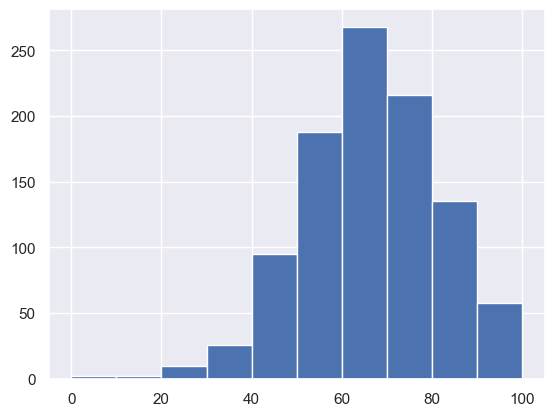

In [222]:
df_stud.math_score.hist()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

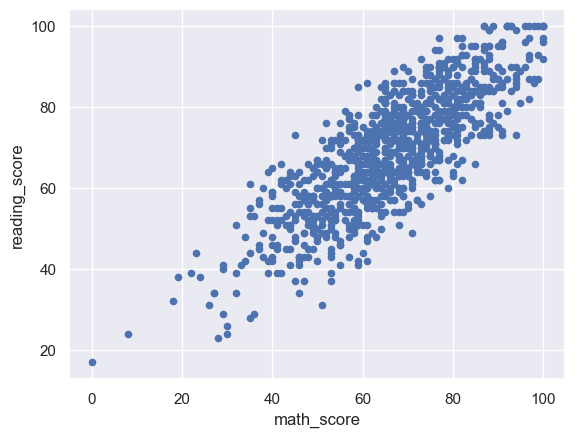

In [225]:
df_stud.plot.scatter(x='math_score', y='reading_score')

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

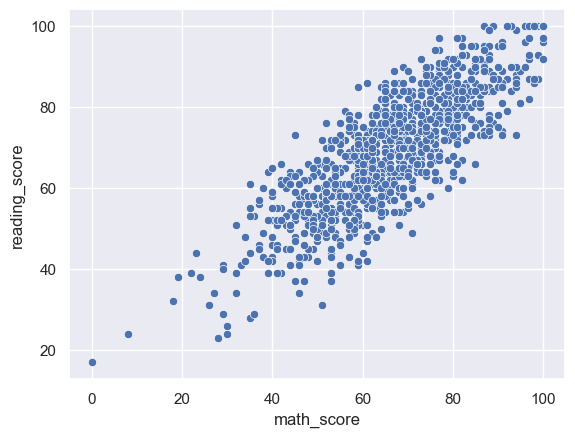

In [226]:
sns.scatterplot(df_stud, x='math_score', y='reading_score')

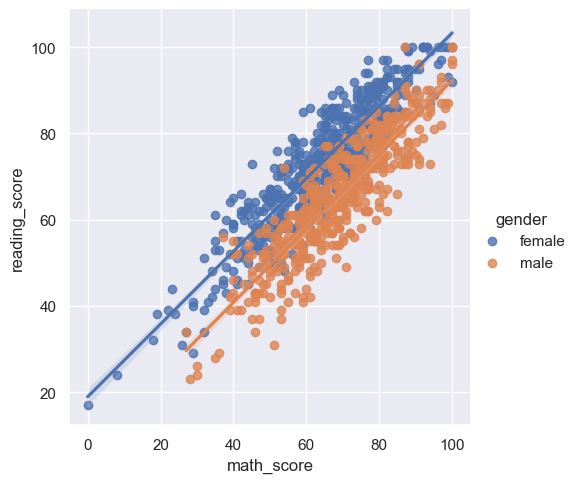

In [228]:
sns.lmplot(df_stud, x='math_score', y='reading_score', hue='gender')

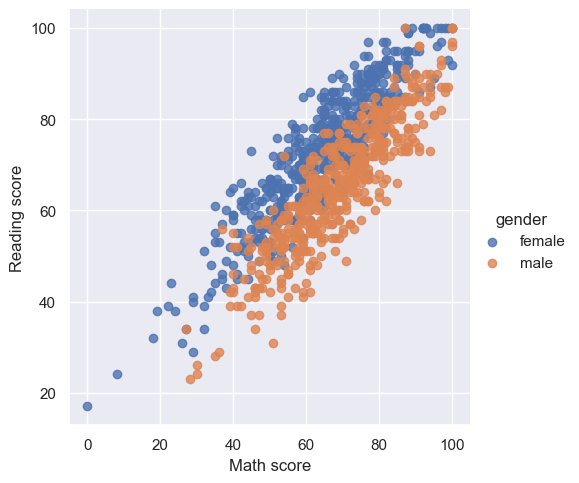

In [231]:
ax = sns.lmplot(df_stud, x='math_score', y='reading_score', hue='gender', fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')
plt.show()

Представьте, что у вас есть датафрэйм df, хранящий данные о зарплате за месяц, со всего 1-ой колонкой income.

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

Убедитесь, что вы используте версию seaborn > = 0.9.

In [232]:
df_month_salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
df_month_salary.head()

income
2018-11-30      20
2018-12-31      60
2019-01-31     180
2019-02-28     380
2019-03-31     660

<AxesSubplot:>

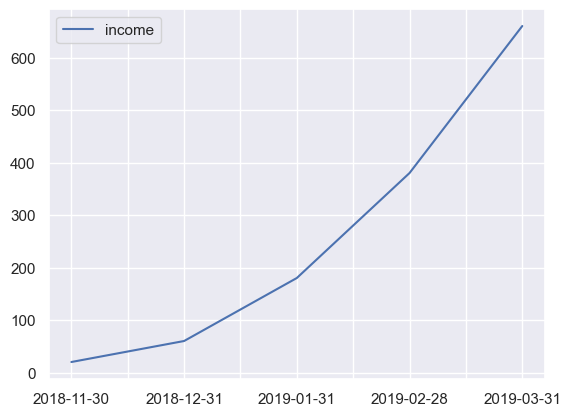

In [233]:
df_month_salary.plot(kind='line')

<AxesSubplot:>

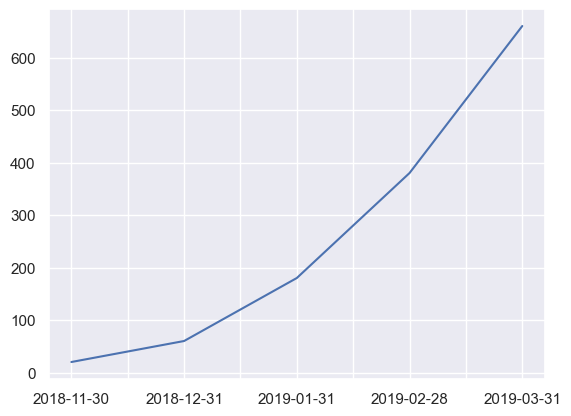

In [234]:
df_month_salary['income'].plot()

<AxesSubplot:>

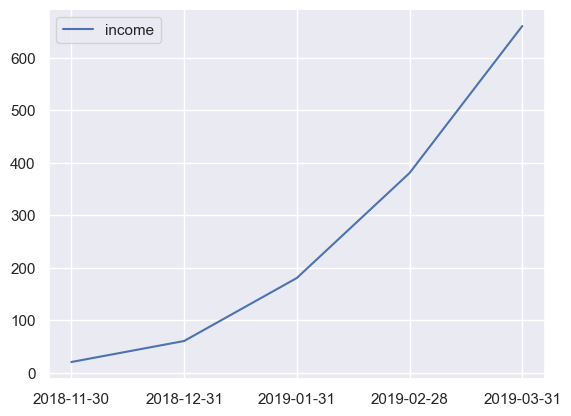

In [235]:
sns.lineplot(data=df_month_salary)

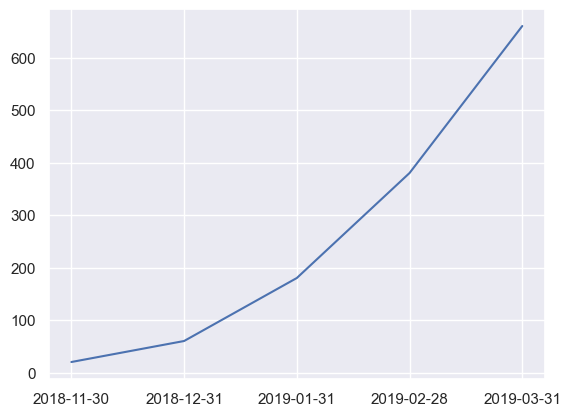

In [236]:
plt.plot(df_month_salary.index, df_month_salary.income)

<AxesSubplot:ylabel='income'>

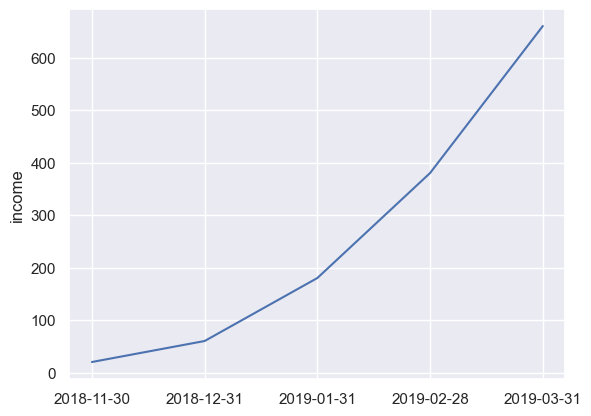

In [237]:
sns.lineplot(x=df_month_salary.index, y=df_month_salary.income)

<AxesSubplot:>

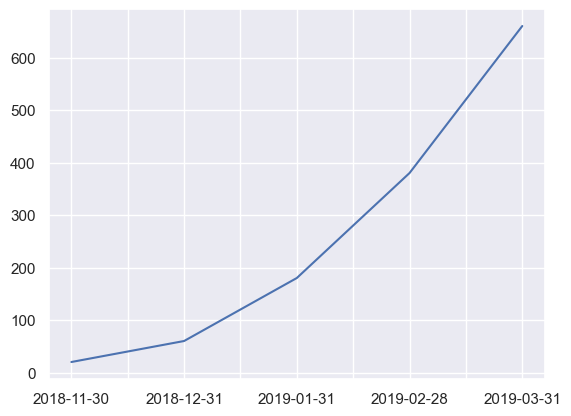

In [238]:
df_month_salary.income.plot()

<AxesSubplot:>

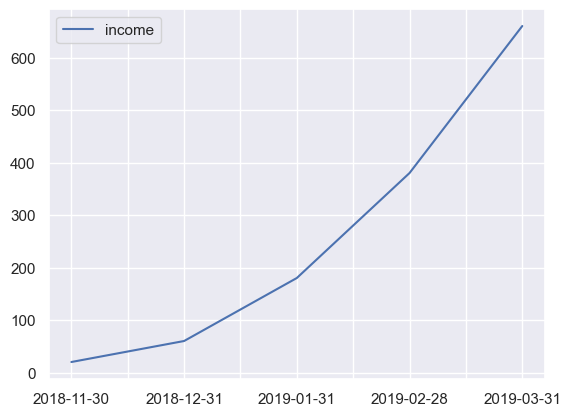

In [239]:
df_month_salary.plot()

Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

В ответе вы должны указать число кластеров в виде числа (например: 3).

In [241]:
df = pd.read_csv('/Users/mitya/Downloads/dataset_209770_6.txt', sep=' ')
df.head()

x           y
0   803.356022  100.644974
1   202.482228  998.508997
2  1102.428182  401.932981
3   808.984883   96.675214
4  1104.631151  411.506192

<AxesSubplot:xlabel='x', ylabel='y'>

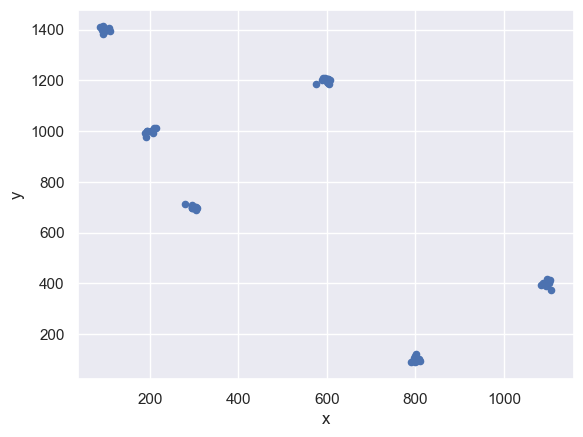

In [243]:
df.plot.scatter(x='x', y='y')

Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

Чтобы график отображался как на картинках, добавьте

In [251]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)
df.head()

species0  species1  species2  species3  species4
species0  0.536029  0.920292  0.679708  0.840606  0.430842
species1  0.920292  0.862417  0.887593  0.769754  0.203214
species2  0.679708  0.887593  0.595156  0.003435  0.096052
species3  0.840606  0.769754  0.003435  0.458870  0.029251
species4  0.430842  0.203214  0.096052  0.029251  0.642109

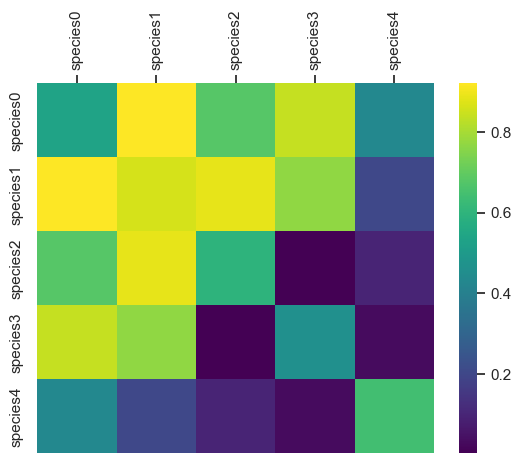

In [250]:
g = sns.heatmap(df, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

Пришло время узнать, кто самый главный рак какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

Это задание можно выполнить многими путями, и рисовать гистограмму вообще говоря для этого не нужно.

Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по dota 2

In [318]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', usecols=['roles'])
df.head()

roles
0                       ['Carry', 'Escape', 'Nuker']
1    ['Initiator', 'Durable', 'Disabler', 'Jungler']
2        ['Support', 'Disabler', 'Nuker', 'Durable']
3  ['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...
4        ['Support', 'Disabler', 'Nuker', 'Jungler']

<AxesSubplot:>

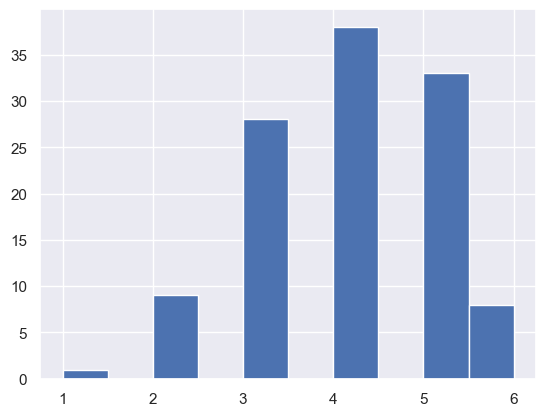

In [299]:
length = [len(i.split(',')) for i in df.roles]
df['length'] = length
df.length.hist()

In [307]:
# разбивает строку
df_1=df.roles.str.split(',')
print(df_1.head())
# добавляет колонку с вычислениями на основе предыдущих колонок
df_1 = df_1.apply(len)
print(df_1.head())
# находит моду
df_1 = df_1.mode()
df_1

0                     [['Carry',  'Escape',  'Nuker']]
1    [['Initiator',  'Durable',  'Disabler',  'Jung...
2     [['Support',  'Disabler',  'Nuker',  'Durable']]
3    [['Carry',  'Disabler',  'Jungler',  'Nuker', ...
4     [['Support',  'Disabler',  'Nuker',  'Jungler']]
Name: roles, dtype: object
0    3
1    4
2    4
3    5
4    4
Name: roles, dtype: int64


0    4
Name: roles, dtype: int64

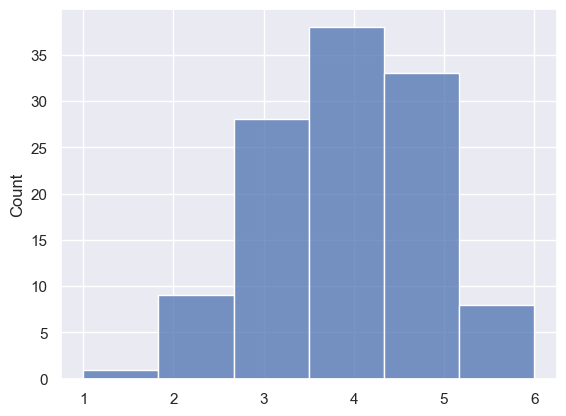

In [310]:
sns.histplot([x.count(',')+1 for x in df.roles], bins=6)
plt.show()

In [314]:
df.roles.map(eval).map(len).mode()

0    4
Name: roles, dtype: int64

In [319]:
# eval — исполняет код на языке питон, переданный в виде строки).
# В нашем случае позволяет преобразовать строку, "выглядящую" как list в настоящий list
df['roles_1'] = df.roles.map(eval)
df

roles  \
0                         ['Carry', 'Escape', 'Nuker']   
1      ['Initiator', 'Durable', 'Disabler', 'Jungler']   
2          ['Support', 'Disabler', 'Nuker', 'Durable']   
3    ['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...   
4          ['Support', 'Disabler', 'Nuker', 'Jungler']   
..                                                 ...   
112       ['Carry', 'Escape', 'Disabler', 'Initiator']   
113         ['Support', 'Nuker', 'Disabler', 'Escape']   
114  ['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc...   
115         ['Support', 'Nuker', 'Disabler', 'Escape']   
116      ['Carry', 'Initiator', 'Disabler', 'Durable']   

                                               roles_1  
0                               [Carry, Escape, Nuker]  
1              [Initiator, Durable, Disabler, Jungler]  
2                  [Support, Disabler, Nuker, Durable]  
3         [Carry, Disabler, Jungler, Nuker, Initiator]  
4                  [Support, Disabler, Nuker, Jungler]  
..                                                 ...  
112               [Carry, Escape, Disabler, Initiator]  
113                 [Support, Nuker, Disabler, Escape]  
114  [Carry, Nuker, Disabler, Durable, Escape, Init...  
115                 [Support, Nuker, Disabler, Escape]  
116              [Carry, Initiator, Disabler, Durable]  

[117 rows x 2 columns]

<AxesSubplot:>

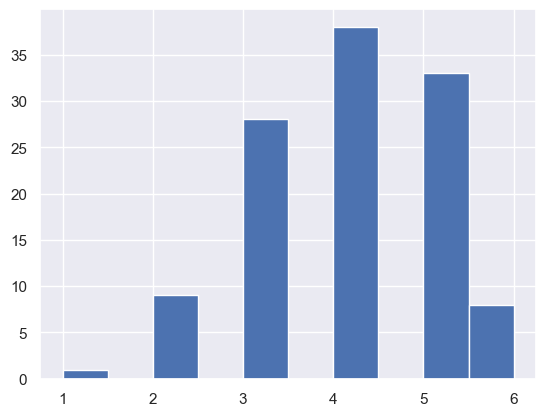

In [320]:
df.roles.map(eval).map(len).hist()

Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

Распределение должно быть по всем образцам, без разделения на вид.
Чтобы построить на 1-ом графике распределения для каждого из параметров, можно воспользоваться петлёй

In [322]:
fl_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
fl_df.head()

sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

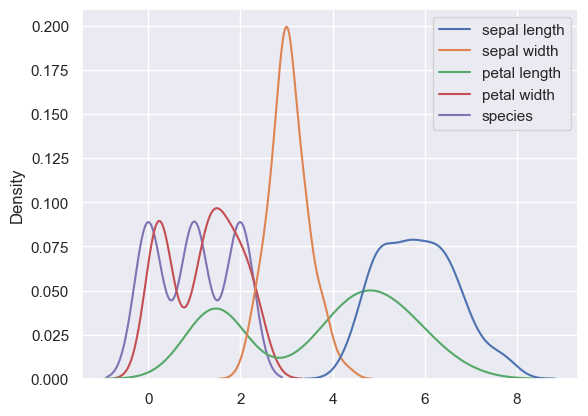

In [352]:
sns.kdeplot(fl_df)
plt.show()

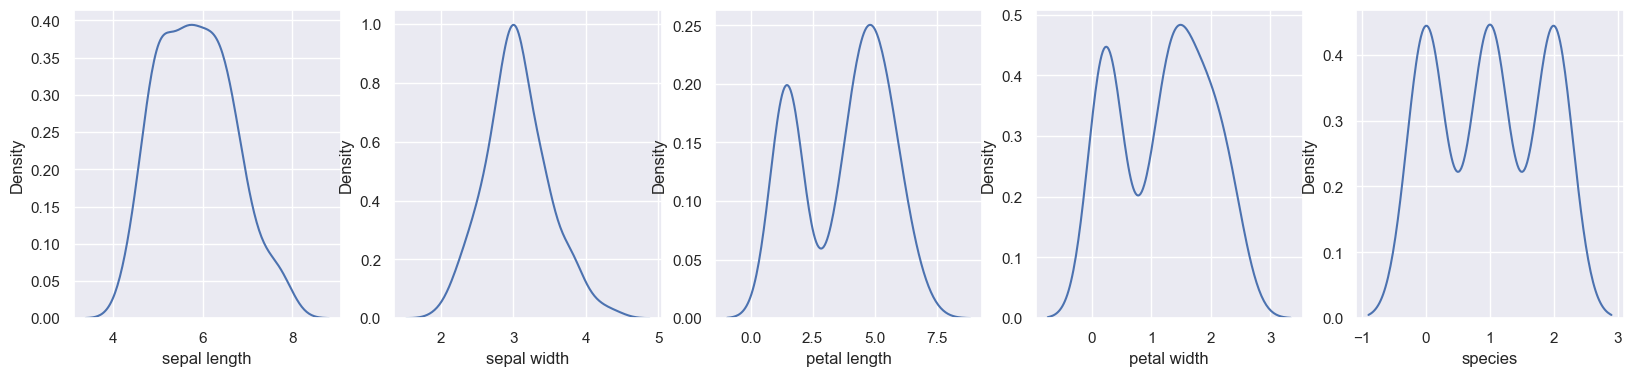

In [374]:
figure, axes = plt.subplots(1, 5, figsize=(20,4))
i = 0
for column in fl_df:
    sns.kdeplot(fl_df, x=column, ax=axes[i])
    i +=1

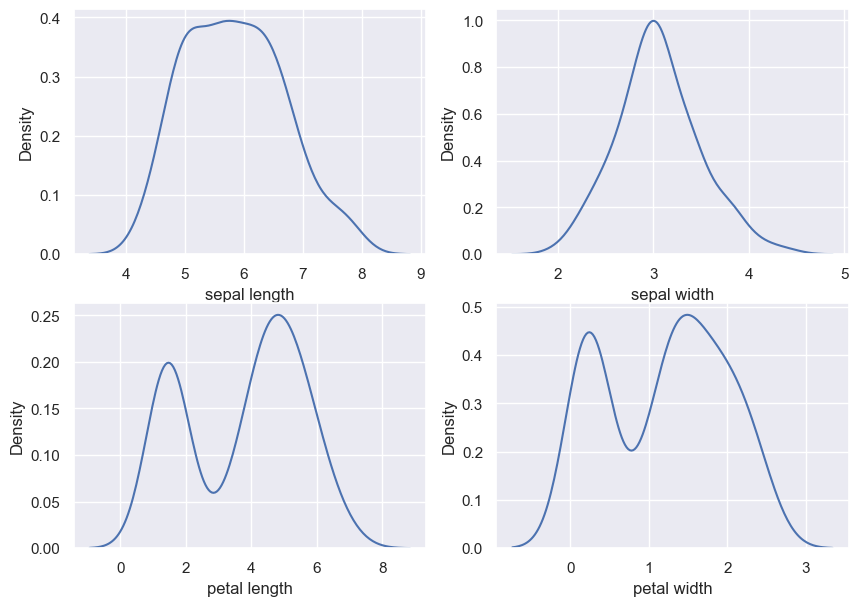

In [377]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))
for column, x in zip(fl_df.iloc[:,0:], [[0,0],[0,1],[1,0],[1,1]]):
    sns.kdeplot(fl_df[column], ax=axs[x[0]][x[1]])

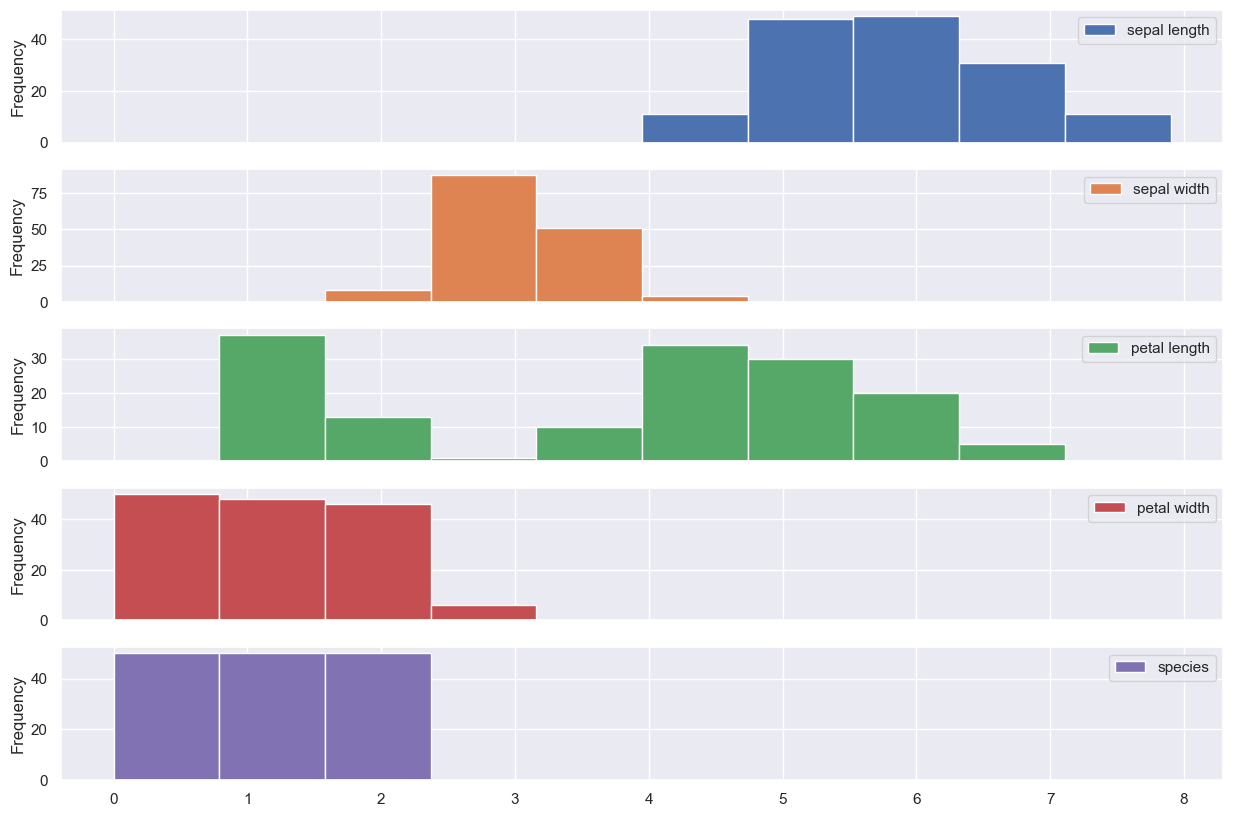

In [381]:
fl_df.plot.hist(subplots=True, figsize = (15, 10));

Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных

<AxesSubplot:ylabel='petal length'>

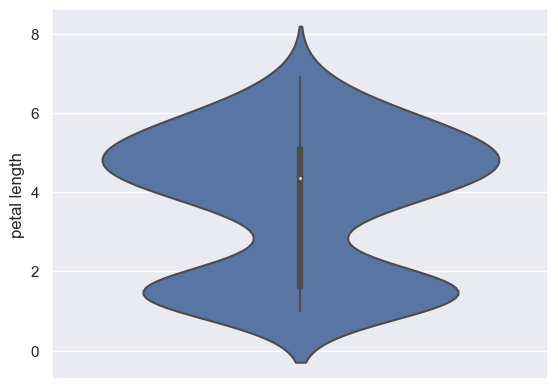

In [387]:
sns.violinplot(fl_df, y='petal length')

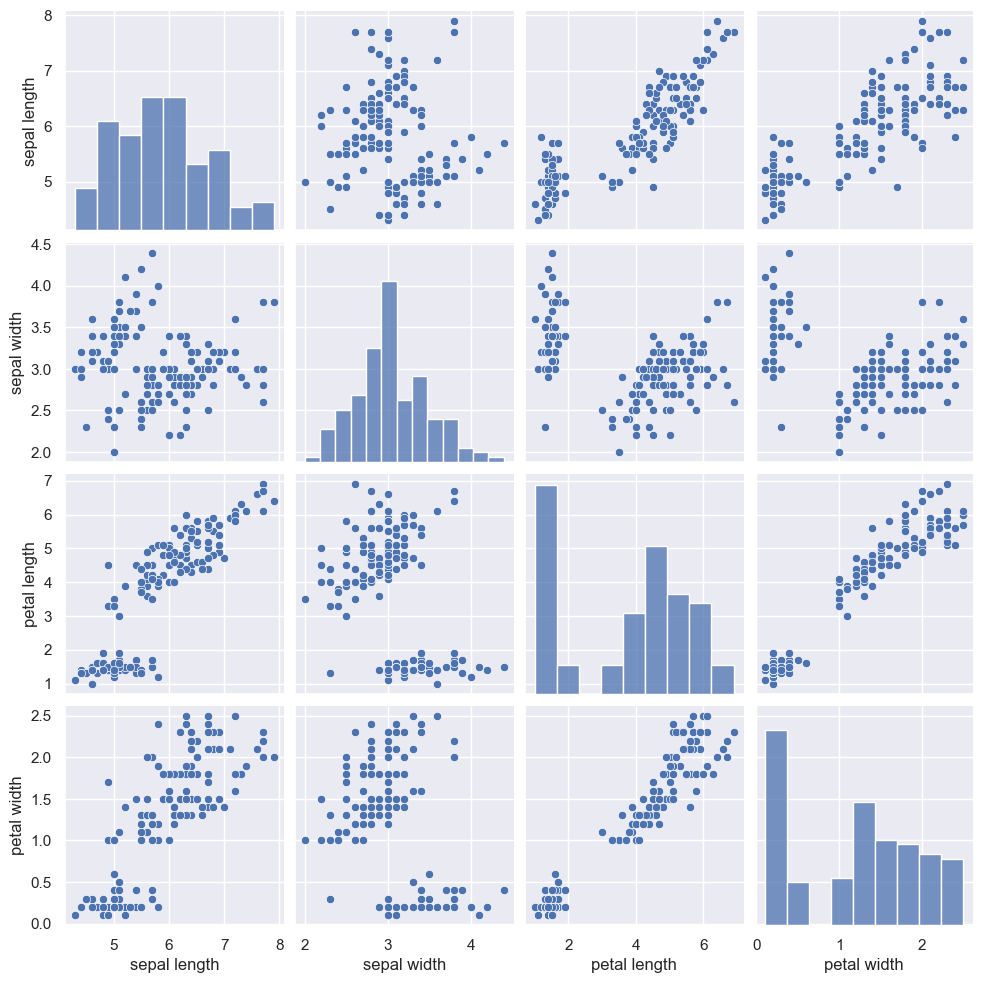

In [390]:
sns.pairplot(fl_df.drop('species', axis=1))

<AxesSubplot:>

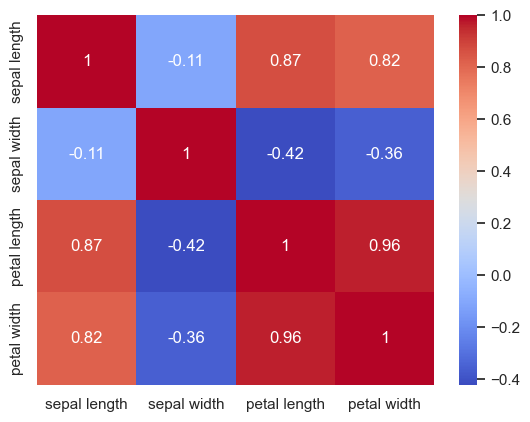

In [396]:
sns.heatmap(fl_df.drop('species', axis=1).corr(), cmap= 'coolwarm', annot=True)

<AxesSubplot:>

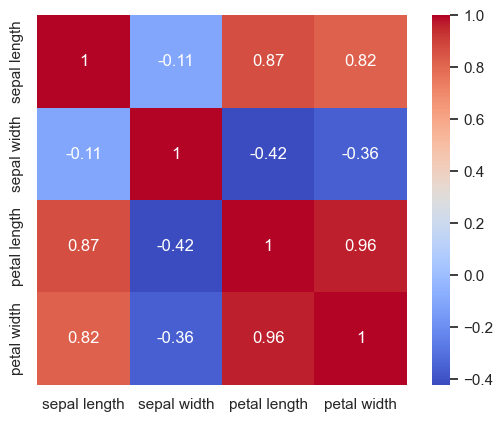

In [397]:
sns.heatmap(fl_df[fl_df.columns[0:4]].corr(), annot=True, square=True, cmap='coolwarm')

Любым удобным для вас способом создайте dataframe c именем my_data, в котором две колонки c именами (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:
```
type value
A    10

A    14

B    12

B    23
```

In [400]:
my_data = pd.DataFrame(data={'type': ['A', 'A', 'B', 'B' ], 'value': [10, 14, 12, 23]})
my_data

type  value
0    A     10
1    A     14
2    B     12
3    B     23

In [401]:
my_data = pd.DataFrame(data=[['A', 10], ['A', 14], ['B', 12], ['B', 23]], columns=['type', 'value'])
my_data

type  value
0    A     10
1    A     14
2    B     12
3    B     23

In [402]:
my_data = pd.DataFrame({"type": list("AABB"), "value": [10, 14, 12, 23]})
my_data

type  value
0    A     10
1    A     14
2    B     12
3    B     23

In [409]:
# перед выполнением read_clipboard скопировать результат из примера
df = pd.read_clipboard()

In [407]:
df.to_dict()

{'type': {0: 'A', 1: 'A', 2: 'B', 3: 'B'},
 'value': {0: 10, 1: 14, 2: 12, 3: 23}}

In [408]:
my_data = pd.DataFrame({'type': {0: 'A', 1: 'A', 2: 'B', 3: 'B'},
 'value': {0: 10, 1: 14, 2: 12, 3: 23}})
my_data

type  value
0    A     10
1    A     14
2    B     12
3    B     23

Особенно важный навык при работе с данными - это умение быстро и эффективно отбирать нужные вам колонки или строки.

Начнем с простого, в dataframe с именем my_stat сохранено 20 строк и четыре колонки (V1, V2, V3, V4):

В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

Помните, что нумерация индексов строк и колонок начинается с 0.

Обратите внимание, получившиеся subset_1 и subset_2 - тоже должны быть dataframe.

In [4]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.head()

V1    V2 V3   V4
0   2  13.0  B  1.0
1  -1   7.0  B  1.0
2   0  11.0  A  0.0
3   2  11.0  A  2.0
4   0  10.0  B -1.0

In [428]:
subset_1 = my_stat.iloc[:10, [0,2]]
subset_2 = my_stat.drop([0, 4])
subset_2 = subset_2.iloc[:, [1,3]]

In [429]:
subset_1 = my_stat.iloc[:10, [0, 2]]
subset_2 = my_stat.iloc[:, [1, 3]].query('index != 0 and index != 4')

In [430]:
subset_1, subset_2 = my_stat.iloc[0:10, [0, 2]], my_stat.iloc[~my_stat.index.isin([0, 4]), [1, 3]]

In [431]:
subset_1 = my_stat[['V1','V3']].head(10)
subset_2 = my_stat[['V2','V4']].drop(my_stat.index[[0,4]])

In [432]:
subset_1 = my_stat.iloc[0:10, [0, 2]]
subset_2 = my_stat.drop([0, 4]).iloc[:, [1, 3]]

Теперь потренируемся отбирать нужные нам наблюдения (строки), соответствующие некому условию. В dataframe с именем my_stat четыре колонки V1, V2, V3, V4:

В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.

В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.

Как и в предыдущей задаче результат фильтрации - это тоже dataframe.

Фильтрацию данных можно осуществить разными способами, например так или так.

In [7]:
subset_1 = my_stat.query('V1 > 0 & V3 =="A"')
subset_2 = my_stat.query('V2 != 10 | V4 >= 1')

In [8]:
%timeit subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
%timeit subset_1 = my_stat.query("(V1 > 0) and (V3 == 'A')" )

%timeit subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
%timeit subset_2 = my_stat.query("(V1 > 0) and (V3 == 'A')" )

517 µs ± 120 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.29 ms ± 8.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
433 µs ± 6.52 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.28 ms ± 8.97 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
%timeit subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
%timeit subset_1 = my_stat.query("(V1 > 0) and (V3 == 'A')" )
%timeit subset_1 = my_stat.iloc[np.where((my_stat.V1.values>0)&(my_stat.V3.values=='A'))]

%timeit subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
%timeit subset_2 = my_stat.query("(V1 > 0) and (V3 == 'A')" )
%timeit subset_2 = my_stat.iloc[np.where((my_stat.V2.values!=10)|(my_stat.V4.values>=1))]

559 µs ± 185 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.28 ms ± 3.64 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
218 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
439 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.47 ms ± 322 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
246 µs ± 41.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Теперь давайте преобразуем наши данные. В переменной my_stat лежат данные с которыми вам необходимо проделать следующее дейтвие. В этих данных (my_stat) создайте две новые переменных:

V5 = V1 + V4

V6 = натуральный логарифм переменной V2

Где найти натуральный логарифм?

In [10]:
my_stat['V5'] = my_stat.V1 + my_stat.V4
my_stat['V6'] = np.log(my_stat.V2)
my_stat

V1    V2 V3   V4   V5        V6
0     2  13.0  B  1.0  3.0  2.564949
1    -1   7.0  B  1.0  0.0  1.945910
2     0  11.0  A  0.0  0.0  2.397895
3     2  11.0  A  2.0  4.0  2.397895
4     0  10.0  B -1.0 -1.0  2.302585
..   ..   ... ..  ...  ...       ...
495   1   8.0  A -1.0  0.0  2.079442
496   3   8.0  A  1.0  4.0  2.079442
497  -1  11.0  B  2.0  1.0  2.397895
498   1  11.0  A  2.0  3.0  2.397895
499   0   8.0  B  1.0  1.0  2.079442

[500 rows x 6 columns]

In [11]:
my_stat=my_stat.assign(V5 = my_stat.V1+my_stat.V4, V6 = np.log(my_stat.V2))

In [12]:
my_stat.eval('V5 = V1 + V4', inplace=True)
my_stat.eval('V6 = log(V2)', inplace=True)

Отличная работа, закрепим еще пару важных вопросов и можно двигаться дальше.

Переменные V1, V2  ... такие имена никуда не годятся. С такими названиями легко запутаться в собственных данных и в результате ошибиться в расчетах.

Переименуйте колонки в данных  my_stat следующим образом:

V1 -> session_value

V2 -> group

V3 -> time

V4 -> n_users

In [16]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [18]:
my_stat=my_stat.rename(columns={'V1': 'session_value', 'V2': 'group', 'V3': 'time', 'V4': 'n_users'})
my_stat

session_value  group time  n_users
0                2   13.0    B      1.0
1               -1    7.0    B      1.0
2                0   11.0    A      0.0
3                2   11.0    A      2.0
4                0   10.0    B     -1.0
..             ...    ...  ...      ...
495              1    8.0    A     -1.0
496              3    8.0    A      1.0
497             -1   11.0    B      2.0
498              1   11.0    A      2.0
499              0    8.0    B      1.0

[500 rows x 4 columns]

In [24]:
for _ in range(10):
    my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
    %timeit my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
    my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
    %timeit my_stat.columns = ['session_value','group','time','n_users']
    my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
    %timeit my_stat.rename(columns={'V1': 'session_value', 'V2': 'group', 'V3': 'time', 'V4': 'n_users'}, inplace=True)
    print('===============')

95.9 µs ± 7.89 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
80.8 µs ± 321 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
249 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
85.6 µs ± 2.32 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
90 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
248 µs ± 3.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
93.8 µs ± 9.11 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
83 µs ± 2.4 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
245 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
84.4 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
85.7 µs ± 4.59 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
234 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
77.1 µs ± 212 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
75.9 µs ± 912 ns per loop (mean ± std. dev

### Замена
И напоследок давайте разберемся, как заменять наблюдения в данных.

В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.

В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).

Как получить медиану переменной n_users без учета отрицательных значений? Если не придумали решения, подсказка - ищите один из возможных ответов в задачах, которые мы уже решили.

Данные для тренировки.

In [102]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
my_stat['session_value'] = my_stat['session_value'].fillna(0)
my_stat.loc[my_stat['n_users'] < 0, 'n_users'] = my_stat.n_users[my_stat.n_users >= 0.0].median()
my_stat['n_users'] = abs(my_stat['n_users'])
my_stat

session_value  group time  n_users
0                2   13.0    B      1.0
1               -1    7.0    B      1.0
2                0   11.0    A      0.0
3                2   11.0    A      2.0
4                0   10.0    B      1.0
..             ...    ...  ...      ...
495              1    8.0    A      1.0
496              3    8.0    A      1.0
497             -1   11.0    B      2.0
498              1   11.0    A      2.0
499              0    8.0    B      1.0

[500 rows x 4 columns]

In [106]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
my_stat = my_stat.fillna(0)
my_stat.loc[my_stat.n_users<0, 'n_users']=my_stat.query("n_users>=0").n_users.median()
my_stat

session_value  group time  n_users
0                2   13.0    B      1.0
1               -1    7.0    B      1.0
2                0   11.0    A      0.0
3                2   11.0    A      2.0
4                0   10.0    B      1.0
..             ...    ...  ...      ...
495              1    8.0    A      1.0
496              3    8.0    A      1.0
497             -1   11.0    B      2.0
498              1   11.0    A      2.0
499              0    8.0    B      1.0

[500 rows x 4 columns]

In [107]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
%timeit my_stat.n_users = my_stat.n_users.apply(lambda x: x if x >= 0 else my_stat.n_users[my_stat.n_users >= 0].median())

my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
%timeit my_stat.n_users.where(my_stat.n_users >= 0, my_stat.n_users[my_stat.n_users >= 0].median(), inplace=True)

my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
%timeit my_stat.loc[my_stat.n_users < 0, 'n_users'] = my_stat[my_stat.n_users >= 0].n_users.median()

my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
%timeit my_stat.loc[my_stat.n_users < 0, 'n_users'] = my_stat.query('n_users >= 0').n_users.median()

346 µs ± 4.83 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
772 µs ± 7.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
728 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.32 ms ± 5.24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [112]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
my_stat = my_stat.replace({'n_users':[my_stat.n_users[my_stat.n_users < 0]]}, my_stat[my_stat.n_users >= 0].n_users.median())
my_stat

session_value  group time  n_users
0                2   13.0    B      1.0
1               -1    7.0    B      1.0
2                0   11.0    A      0.0
3                2   11.0    A      2.0
4                0   10.0    B      1.0
..             ...    ...  ...      ...
495              1    8.0    A      1.0
496              3    8.0    A      1.0
497             -1   11.0    B      2.0
498              1   11.0    A      2.0
499              0    8.0    B      1.0

[500 rows x 4 columns]

In [117]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
df1 = my_stat.session_value.fillna(0)
my_stat.update(df1)

%timeit my_stat.n_users = my_stat.n_users.replace([my_stat.n_users[my_stat.n_users < 0]], my_stat[my_stat.n_users >=0].n_users.median())

1.13 ms ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
mean_session_value_data = my_stat.groupby('group', as_index=False).agg({'session_value': 'mean'}).rename(columns={'session_value': 'mean_session_value'})

In [122]:
mean_session_value_data

group  mean_session_value
0    5.0            0.000000
1    7.0            0.333333
2    8.0            0.633333
3    9.0            0.238938
4   10.0            0.065990
5   11.0           -0.081081
6   12.0           -0.078947
7   13.0            0.000000

### Stepik ML contest

In [4]:
events_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
events_train.head()

step_id   timestamp      action  user_id
0    32815  1434340848      viewed    17632
1    32815  1434340848      passed    17632
2    32815  1434340848  discovered    17632
3    32811  1434340895  discovered    17632
4    32811  1434340895      viewed    17632

In [5]:
# description
# step_id - id стэпа
# user_id - анонимизированный id юзера
# timestamp - время наступления события в формате unix date
# action - событие, возможные значения:
# discovered - пользователь перешел на стэп
# viewed - просмотр шага,
# started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
# passed - удачное решение практического шага

In [6]:
submissions_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
submissions_train.head()

step_id   timestamp submission_status  user_id
0    31971  1434349275           correct    15853
1    31972  1434348300           correct    15853
2    31972  1478852149             wrong    15853
3    31972  1478852164           correct    15853
4    31976  1434348123             wrong    15853

In [7]:
# description
# step_id - id стэпа
# timestamp - время отправки решения в формате unix date
# submission_status - статус решения
# user_id - анонимизированный id юзера

### Data preparation

In [8]:
events_train['date'] = pd.to_datetime(events_train.timestamp, unit='s')
events_train.head()

step_id   timestamp      action  user_id                date
0    32815  1434340848      viewed    17632 2015-06-15 04:00:48
1    32815  1434340848      passed    17632 2015-06-15 04:00:48
2    32815  1434340848  discovered    17632 2015-06-15 04:00:48
3    32811  1434340895  discovered    17632 2015-06-15 04:01:35
4    32811  1434340895      viewed    17632 2015-06-15 04:01:35

In [12]:
events_train['day'] = events_train.date.dt.date
events_train.head()

step_id   timestamp      action  user_id                date         day
0    32815  1434340848      viewed    17632 2015-06-15 04:00:48  2015-06-15
1    32815  1434340848      passed    17632 2015-06-15 04:00:48  2015-06-15
2    32815  1434340848  discovered    17632 2015-06-15 04:00:48  2015-06-15
3    32811  1434340895  discovered    17632 2015-06-15 04:01:35  2015-06-15
4    32811  1434340895      viewed    17632 2015-06-15 04:01:35  2015-06-15

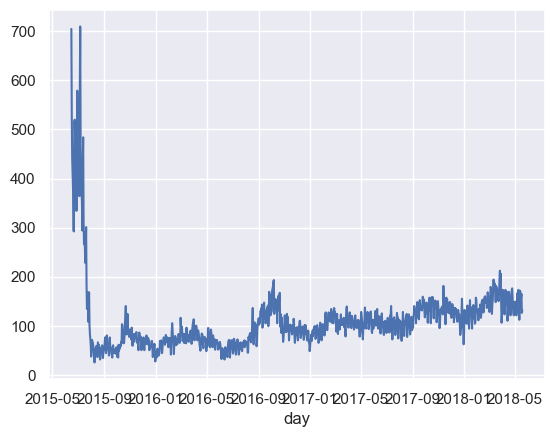

In [14]:
# считаем кол-во уникальных пользователей
events_train.groupby('day')['user_id'].nunique().plot()
plt.show()

array([[<AxesSubplot:title={'center':'passed_step'}>]], dtype=object)

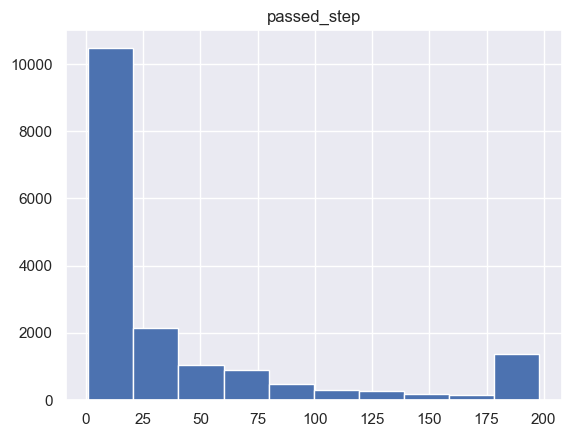

In [18]:
events_train[events_train.action == 'passed'].groupby('user_id').aggregate({'step_id': 'count'}).rename(columns={'step_id': 'passed_step'}).hist()

In [33]:
events_train.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index().head()

action  user_id  discovered  passed  started_attempt  viewed
0             1           1       0                0       1
1             2           9       9                2      10
2             3          91      87               30     192
3             5          11      11                4      12
4             7           1       1                0       1

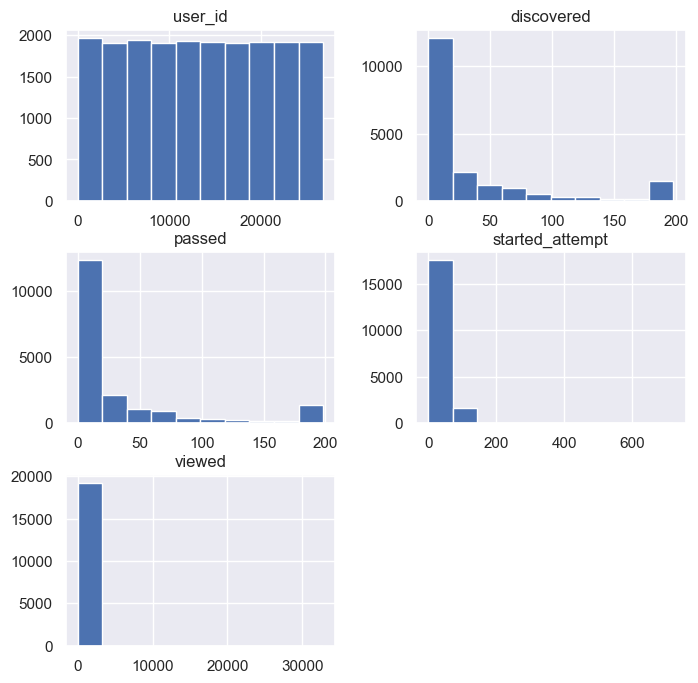

In [31]:
events_train.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index().hist(figsize=(8, 8))
plt.show()

In [34]:
submissions_train['date'] = pd.to_datetime(submissions_train.timestamp, unit='s')
submissions_train.head()

step_id   timestamp submission_status  user_id                date
0    31971  1434349275           correct    15853 2015-06-15 06:21:15
1    31972  1434348300           correct    15853 2015-06-15 06:05:00
2    31972  1478852149             wrong    15853 2016-11-11 08:15:49
3    31972  1478852164           correct    15853 2016-11-11 08:16:04
4    31976  1434348123             wrong    15853 2015-06-15 06:02:03

In [35]:
submissions_train['day'] = submissions_train.date.dt.date
submissions_train.head()

step_id   timestamp submission_status  user_id                date  \
0    31971  1434349275           correct    15853 2015-06-15 06:21:15   
1    31972  1434348300           correct    15853 2015-06-15 06:05:00   
2    31972  1478852149             wrong    15853 2016-11-11 08:15:49   
3    31972  1478852164           correct    15853 2016-11-11 08:16:04   
4    31976  1434348123             wrong    15853 2015-06-15 06:02:03   

          day  
0  2015-06-15  
1  2015-06-15  
2  2016-11-11  
3  2016-11-11  
4  2015-06-15

In [37]:
submissions_train.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index().head()

submission_status  user_id  correct  wrong
0                        2        2      0
1                        3       29     23
2                        5        2      2
3                        8        9     21
4                       14        0      1

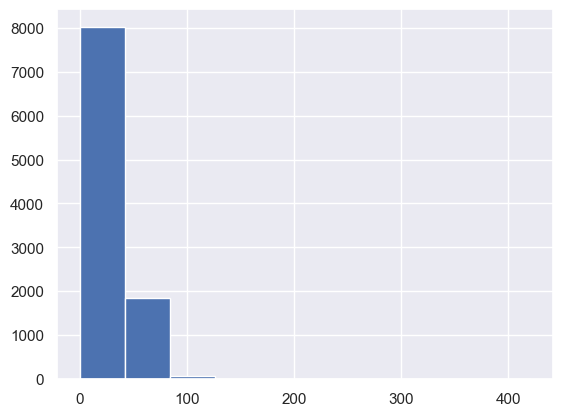

In [41]:
submissions_train.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index().correct.hist()
plt.show()

### Задача
Отсечь пользователей, которые не закончили курс. Допустим, если пользователь не возвращался к курсу какое-то время, то с высокой вероятностью он уже не вернется для завершения курса.

**Шаг 1**
Найдем временные промежутки между прохождением степов, далее посмотрим в какой интервал укладывается большинство пользователей.

In [54]:
# для работы нам потребуется 3 колонки
visits_gap = events_train[['user_id', 'day', 'timestamp']]
visits_gap.head()

user_id         day   timestamp
0    17632  2015-06-15  1434340848
1    17632  2015-06-15  1434340848
2    17632  2015-06-15  1434340848
3    17632  2015-06-15  1434340895
4    17632  2015-06-15  1434340895

In [55]:
# оставляем только уникальные записи timestamp в рамках одного пользователя и дня
visits_gap = visits_gap.drop_duplicates(subset=['user_id', 'day'])
visits_gap.head()

user_id         day   timestamp
0     17632  2015-06-15  1434340848
36    12494  2015-06-15  1434341931
59      442  2015-06-15  1434342029
62    22254  2015-06-15  1434342042
94     6646  2015-06-15  1434342230

In [56]:
# создаем список с timestamp действий пользователя
visits_gap = visits_gap.groupby('user_id')['timestamp'].apply(list)
visits_gap.head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [57]:
# считаем разницу между событиями
visits_gap = visits_gap.apply(np.diff)
visits_gap.head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [58]:
# извлекаем из серии значения
visits_gap = visits_gap.values
visits_gap

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int64)], dtype=object)

In [59]:
# трансформируем события в плоский список
visits_gap = pd.Series(np.concatenate(visits_gap, axis=0))
visits_gap

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int64

In [62]:
# меняем формат в дни
visits_gap = visits_gap / (24 * 60 * 60)

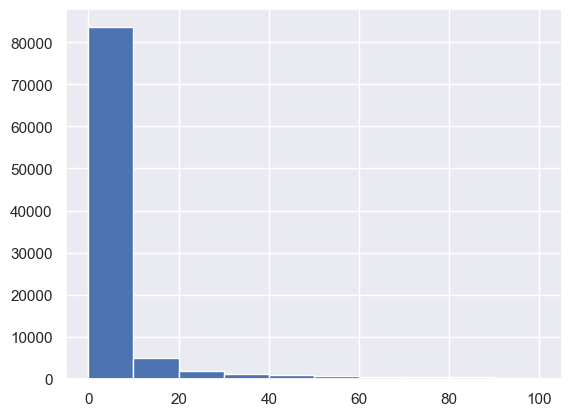

In [64]:
# строим гистограмму
visits_gap[visits_gap < 100].hist()
plt.show()

In [67]:
# смотрим в какой интервал времени укладывается 90% событий
visits_gap.quantile(0.90)

18.325995370370403

In [112]:
is_gone_time_gap = visits_gap.quantile(0.90)

**Шаг 2**
Смержим наши данные в таблицу и дополним ее необходимыми значениями

In [158]:
events_pivot = events_train.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index()
events_pivot.head()

action  user_id  discovered  passed  started_attempt  viewed
0             1           1       0                0       1
1             2           9       9                2      10
2             3          91      87               30     192
3             5          11      11                4      12
4             7           1       1                0       1

In [159]:
submissions_pivot = submissions_train.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index()
submissions_pivot.head()

submission_status  user_id  correct  wrong
0                        2        2      0
1                        3       29     23
2                        5        2      2
3                        8        9     21
4                       14        0      1

In [160]:
users_data = events_pivot.merge(submissions_pivot, on='user_id', how='outer')
users_data = users_data.fillna(0)
users_data.head()

user_id  discovered  passed  started_attempt  viewed  correct  wrong
0        1           1       0                0       1      0.0    0.0
1        2           9       9                2      10      2.0    0.0
2        3          91      87               30     192     29.0   23.0
3        5          11      11                4      12      2.0    2.0
4        7           1       1                0       1      0.0    0.0

In [161]:
last_timestamp = events_train[['user_id','timestamp']].groupby('user_id').aggregate({'timestamp':'max'}).reset_index().rename(columns={'timestamp': 'last_timestamp'})

In [162]:
last_timestamp.head()

user_id  last_timestamp
0        1      1472827464
1        2      1519226966
2        3      1444581588
3        5      1499859939
4        7      1521634660

In [163]:
users_data = users_data.merge(last_timestamp, on='user_id', how='outer').fillna(0)
users_data.head()

user_id  discovered  passed  started_attempt  viewed  correct  wrong  \
0        1           1       0                0       1      0.0    0.0   
1        2           9       9                2      10      2.0    0.0   
2        3          91      87               30     192     29.0   23.0   
3        5          11      11                4      12      2.0    2.0   
4        7           1       1                0       1      0.0    0.0   

   last_timestamp  
0      1472827464  
1      1519226966  
2      1444581588  
3      1499859939  
4      1521634660

In [164]:
now_t = users_data.last_timestamp.max()
now_t

1526772811

In [165]:
users_data['is_gone'] = now_t - users_data['last_timestamp']  > is_gone_time_gap
users_data.head()

user_id  discovered  passed  started_attempt  viewed  correct  wrong  \
0        1           1       0                0       1      0.0    0.0   
1        2           9       9                2      10      2.0    0.0   
2        3          91      87               30     192     29.0   23.0   
3        5          11      11                4      12      2.0    2.0   
4        7           1       1                0       1      0.0    0.0   

   last_timestamp  is_gone  
0      1472827464     True  
1      1519226966     True  
2      1444581588     True  
3      1499859939     True  
4      1521634660     True

In [166]:
users_data['course_completed'] = users_data.passed > 170
users_data.head()

user_id  discovered  passed  started_attempt  viewed  correct  wrong  \
0        1           1       0                0       1      0.0    0.0   
1        2           9       9                2      10      2.0    0.0   
2        3          91      87               30     192     29.0   23.0   
3        5          11      11                4      12      2.0    2.0   
4        7           1       1                0       1      0.0    0.0   

   last_timestamp  is_gone  course_completed  
0      1472827464     True             False  
1      1519226966     True             False  
2      1444581588     True             False  
3      1499859939     True             False  
4      1521634660     True             False

In [168]:
users_data.groupby('course_completed').count()

user_id  discovered  passed  started_attempt  viewed  \
course_completed                                                         
False               17809       17809   17809            17809   17809   
True                 1425        1425    1425             1425    1425   

                  correct  wrong  last_timestamp  is_gone  
course_completed                                           
False               17809  17809           17809    17809  
True                 1425   1425            1425     1425

### Задача
Как я уже писал ранее, данные, с которыми мы работаем, обезличены, тоесть реальные id пользователей заменены случайным числом. Анонимизация пользовательских данных - очень важная тема для Data Science. С одной стороны мы хотим знать о поведении наших пользователей как можно больше, с другой стороны нам важно соблюдать приватность наших пользователей.

Поэтому данные о поведении пользователей анонимизируют не только когда речь идет об открытых данных, но и при работе с данными внутри компании. Не заметили сколько писем вам недавно пришло об изменении политики конфеденциальности, хотите узнать почему? В комментарии приложена ссылка на очень интересный доклад об этой проблеме.

А пока что вот вам хакерская задача, за каким вымышленным id скрывается Анатолий Карпов - автор курса, данные которого мы анализируем?

Введите id Анатолия Карпова, под которым он фигурирует в данных events_data_train и submissions_data_train.

In [136]:
events_train.groupby('user_id').aggregate({'action': 'count'})

action
user_id        
1             2
2            30
3           400
5            38
7             3
...         ...
26790        26
26793         3
26794       352
26797        35
26798        39

[19234 rows x 1 columns]

In [68]:
events_train.head()

step_id   timestamp      action  user_id                date         day
0    32815  1434340848      viewed    17632 2015-06-15 04:00:48  2015-06-15
1    32815  1434340848      passed    17632 2015-06-15 04:00:48  2015-06-15
2    32815  1434340848  discovered    17632 2015-06-15 04:00:48  2015-06-15
3    32811  1434340895  discovered    17632 2015-06-15 04:01:35  2015-06-15
4    32811  1434340895      viewed    17632 2015-06-15 04:01:35  2015-06-15

In [73]:
events_train[events_train.user_id == 20907].timestamp.min()

1434346645

In [74]:
events_train[events_train.user_id == 20907].timestamp.max()

1453480839

In [75]:
gap = events_train[events_train.user_id == 20907].timestamp.max() - events_train[events_train.user_id == 20907].timestamp.min()
gap = gap / (24 * 60 * 60)
gap

221.4605787037037

In [97]:
gap = events_train[events_train.action == 'viewed']

In [98]:
max_timestamp = gap.groupby('user_id').timestamp.apply(list).apply(max)

In [99]:
min_timestamp = gap.groupby('user_id').timestamp.apply(list).apply(min)

In [103]:
gap_t = pd.concat([min_timestamp, max_timestamp], axis=1, ignore_index=True)
gap_t.head()

0           1
user_id                        
1        1472827464  1472827464
2        1514383364  1519226966
3        1434358476  1444581588
5        1466156809  1499859939
7        1521634660  1521634660

In [104]:
gap_t['gap'] = gap_t[1] - gap_t[0]
gap_t

0           1       gap
user_id                                  
1        1472827464  1472827464         0
2        1514383364  1519226966   4843602
3        1434358476  1444581588  10223112
5        1466156809  1499859939  33703130
7        1521634660  1521634660         0
...             ...         ...       ...
26790    1451484016  1517495987  66011971
26793    1510225031  1510225031         0
26794    1495287049  1512035039  16747990
26797    1508425316  1509995096   1569780
26798    1520975763  1520978742      2979

[19227 rows x 3 columns]

In [111]:
unique_days = events_train.groupby('user_id')['day'].nunique()
unique_days

user_id
1        1
2        2
3        7
5        2
7        1
        ..
26790    4
26793    1
26794    9
26797    2
26798    1
Name: day, Length: 19234, dtype: int64

## 2-ая неделя Решающие деревья
<a href='https://habr.com/ru/company/ods/blog/322534/'>Отличная статья</a>
<a href='https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8'>Еще одна отличная статья</a>
<a href='https://www.youtube.com/watch?v=-dCtJjlEEgM'>Лекция</a>
<a href='http://www.r2d3.us'>Визуализация</a>

### Основные понятия
<a href='https://www.youtube.com/watch?v=IPkRVpXtbdY'>Entropy and Information gain</a>
<a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html'>Train / test split</a>
<a href='http://scikit-learn.org/stable/modules/cross_validation.html'>K-fold cross-validation</a>
<a href='http://scikit-learn.org/stable/modules/grid_search.html'>Hyper parameters and Grid search</a>

Дерево решений - алгоритм машинного обучения для регрессии и классификации. Остановимся подробнее на задаче классификатора. В процессе построения дерева выбираются переменные разделение, по которым позволяет нам с большей точностью разделять исследуемые классы. В каждом листе дерева находится одно условие, которое разбивает наш набор данных на два подмножества.

Процесс выбора фичей, которые помещаются в лист дерева основывается на расчете Information gain. Могут использоваться и другие критерии.

По умолчанию классификатор строит настолько глубокое дерево, насколько позволяет набор данных. Таким образом, классификатор преследует цель безошибочно отнести к нужному классу все объекты в выборке. Такой "жадный" алгоритм может приводить к переобучению в результате избыточной глубины дерева.

Проверить насколько сильно переобучен классификатор можно обучив его на обучающей выборке затем проверить качество модели на тестовой выборке.
Основная цель построения любой модели - получить классификатор с максимальной обобщающей способностью, т.е. такой классификатор, который успешно выделяет общие закономерности и не переобучается на частных закономерностях в конкретной выборке.

Для этой цели мы подбираем оптимальный набор параметров классификатора, в случае дерева решений - это может быть глубина дерева. Для выбора оптимального параметра можно построить множество деревьев с разной глубиной и выбрать наилучший результат.

В качестве критерия "наилучшего" классификатора можно использовать кросс-валидацию. При таком подходе данные в выборке разбиваются на n частей, например на 5 частей, далее классификатор обучается на 4 частях данных и валидируется на оставшейся 5ой части. Затем операция повторяется, чтобы каждая из 5 частей данных оказалась в роли тестового множества.

In [191]:
from math import log2

В нашем Big Data датасэте появились новые наблюдения! Давайте немного посчитаем энтропию, чтобы лучше понять, формализуемость разделения на группы.

Формат записи - энтропия в группе, где переменная равна 0 и энтропия в группе, где переменная равна 1 (десятичный разделитель - точка, округляйте до 2-ого знака при необходимости).

In [173]:
animals_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv', index_col=0)
animals_data.head()

Шерстист  Гавкает  Лазает по деревьям      Вид
0         1        1                   0  собачка
1         1        1                   0  собачка
2         1        1                   0  собачка
3         1        1                   0  собачка
4         1        0                   1    котик

In [174]:
animals_data.groupby('Шерстист')['Вид'].count()

Шерстист
1    8
Name: Вид, dtype: int64

In [177]:
animals_data.groupby('Гавкает')['Вид'].count()

Гавкает
0    4
1    4
Name: Вид, dtype: int64

In [178]:
animals_data.groupby('Лазает по деревьям')['Вид'].count()

Лазает по деревьям
0    4
1    4
Name: Вид, dtype: int64

In [237]:
animals_data_update = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)
animals_data_update

Шерстист  Гавкает  Лазает по деревьям      Вид
0         1        1                   0  собачка
1         1        1                   0  собачка
2         1        1                   0  собачка
3         1        1                   0  собачка
4         1        0                   1    котик
5         1        0                   1    котик
6         1        0                   1    котик
7         1        0                   1    котик
8         1        1                   1    котик
9         0        0                   1    котик

In [268]:
E_sh_1 = -(4/9)*log2((4/9)) - (5/9)*log2((5/9))
print(E_sh_1)
E_sh_0 = -0 - (1/1)*log2(1/1)
print(E_sh_0)
E_gav_1 = -(4/5)*log2((4/5)) - (1/5)*log2((1/5))
print(E_gav_1)
E_gav_0 = - 0 - (5/5)*log2((5/5))
print(E_gav_0)
E_laz_1 = -0 - (6/6)*log2((6/6))
print(E_laz_1)
E_laz_0 = -(4/4)*log2((4/4)) - 0
print(E_laz_0)

0.9910760598382222
0.0
0.7219280948873623
0.0
0.0
-0.0


In [271]:
s_0 = -(4/10) * log2(4/10) - (6/10) * log2(6/10)
print(s_0)
ig_sh = s_0 - (9/10) * E_sh_1 - (1/10) * E_sh_0
print(round(ig_sh, 2))
ig_gav = s_0 - (5/10) * E_gav_1 - (5/10) * E_gav_0
print(round(ig_gav, 2))
ig_laz = s_0 - (6/10) * E_laz_1 -  (4/10) * E_laz_0
print(round(ig_laz, 2))

0.9709505944546686
0.08
0.61
0.97


# Задача
Предсказать выживание на Титанике, используя дерево решений.
<a href='https://www.kaggle.com/competitions/titanic/data'>Kaggle</a>
<a href='https://scikit-learn.org/stable/modules/cross_validation.html'>Кросс-валидация</a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"

In [2]:
titanic_train_data = pd.read_csv('https://raw.githubusercontent.com/betelgeus/study/master/data/titanic/train.csv')
titanic_train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
X = titanic_train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)

In [5]:
y = titanic_train_data['Survived']

In [6]:
X = pd.get_dummies(X)

In [7]:
X = X.fillna({'Age': X.Age.median()})

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [9]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

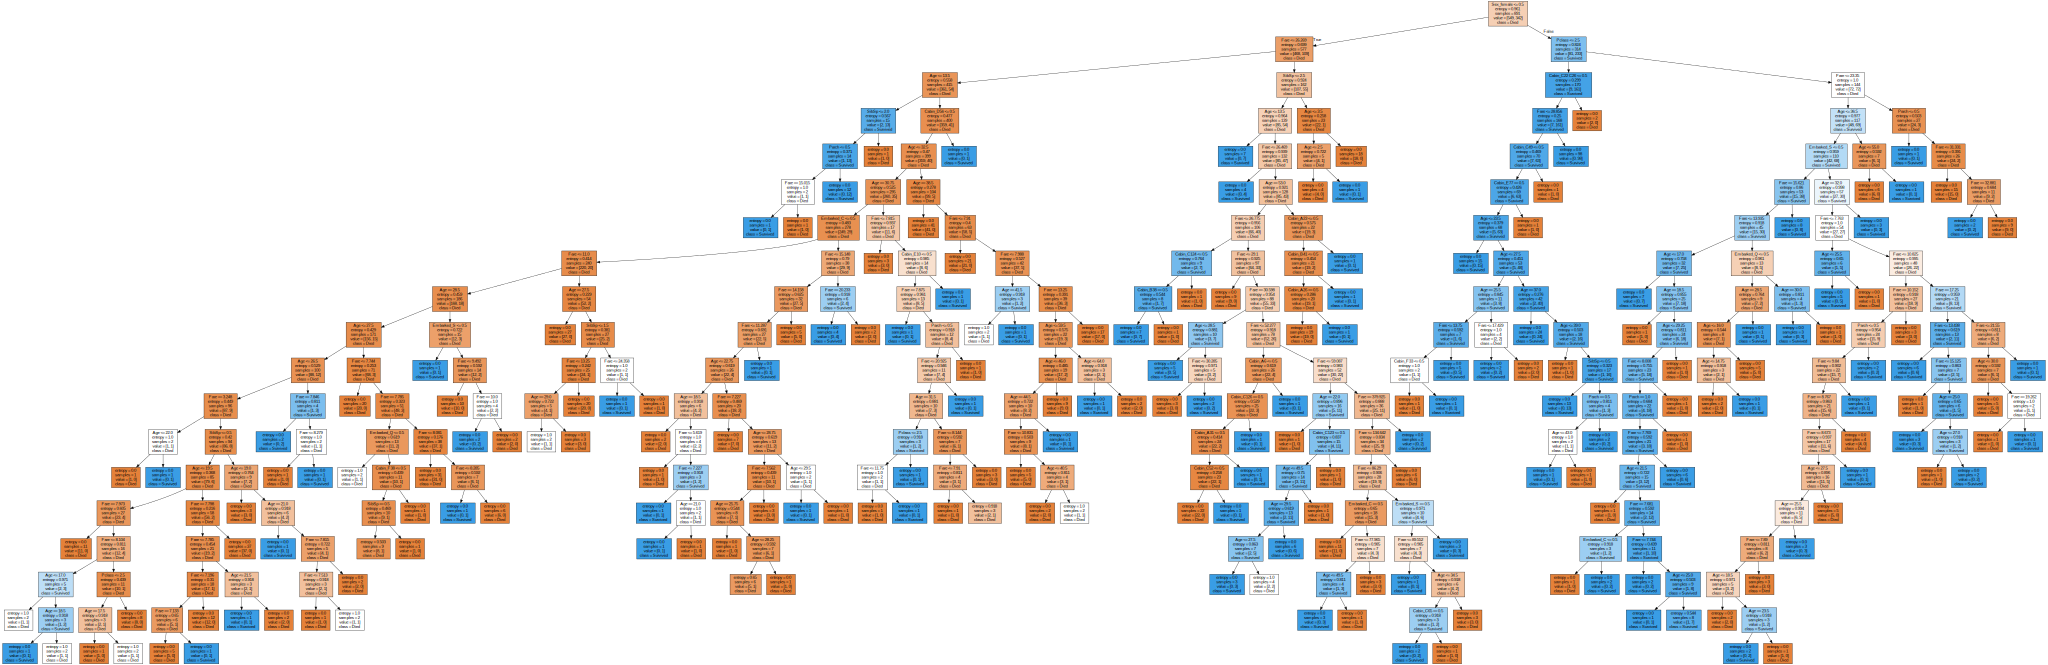

In [10]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

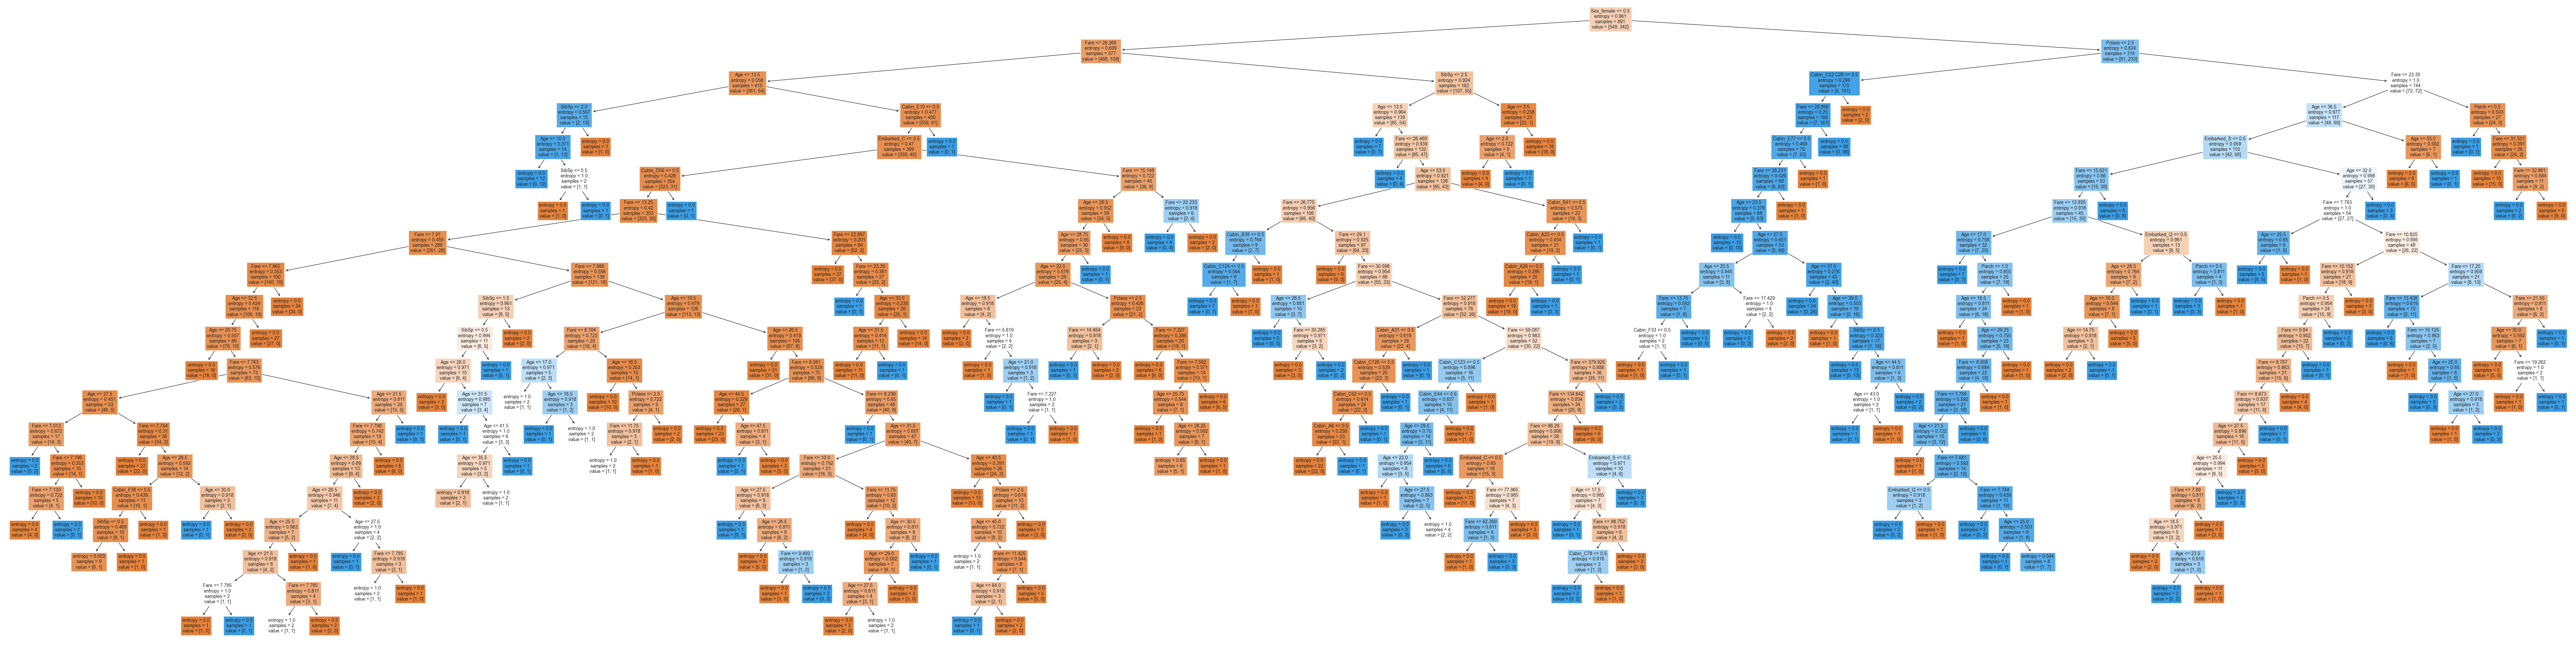

In [17]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [40]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [41]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [42]:
clf.score(X_train, y_train)

0.8271812080536913

In [43]:
clf.score(X_test, y_test)

0.8203389830508474

In [45]:
data = []
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_data = (max_depth, train_score, test_score)
    data.append(temp_data)
scores_data = pd.DataFrame(data, columns=['max_depth', 'train_score', 'test_score'])

In [46]:
scores_data.head()

max_depth  train_score  test_score
0          1     0.781879    0.796610
1          2     0.805369    0.776271
2          3     0.827181    0.820339
3          4     0.840604    0.823729
4          5     0.847315    0.816949

In [47]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score','test_score'], var_name = 'set_type', value_name = 'score')

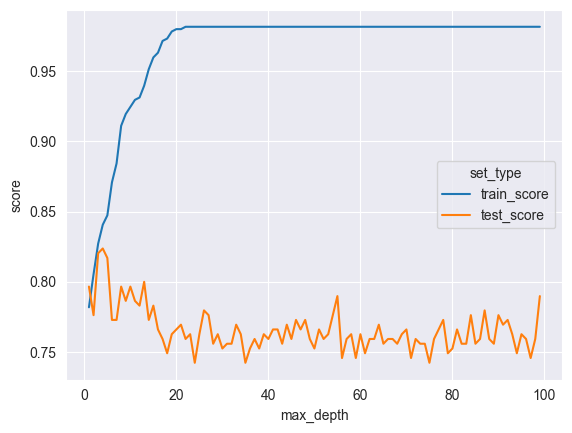

In [48]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)
plt.show()

In [ ]:
'''
Так выглядит возможный пример дерева с параметром максимальной глубины равным 3. Легко можно заметить, что особенно важными переменными для анализа является пол и возраст. Кстати, про то, как при помощи дерева решений вычленить фичи, максимально важные для решения конкретной задачи классификации, мы подробнее поговорим в 3 модуле курса.

Тут же обратите внимание на еще один важный момент, если бы к нам поступил новый пассажир, и мы бы захотели, предсказать для него не только значение класса но и вероятность, того что он выживет на Титанике, это было бы несложно сделать при помощи нашего дерева. Обратите внимание, цвет финальных прямоугольничков различается, соотношение выживших/погибших пассажиров различается в финальных исходах - прямоугольничках.

Например, если бы к нам пришло новое наблюдение Sex_male <=0.05, Pclass <= 2.5, Age > 2.5,  то предсказанная вероятность выжить была бы равна 102 / (102 + 3), то есть 97%.

Но давайте сразу поймем, что с нашим деревом не так? Обратите внимание, что данное дерево все равно выглядит переобученным, например, есть разделение, которое приводит к тому, что под условие Age <= 2.5 проходит всего два наблюдения с разными классами, запомним эту проблему деревьев и вернемся к ней позже.
'''

In [50]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [51]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

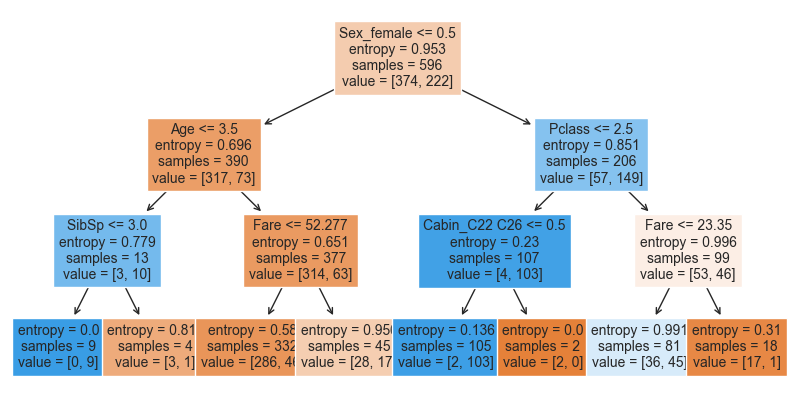

In [54]:
plt.figure(figsize=(10, 5))
tree.plot_tree(clf, fontsize=10, feature_names=list(X_train), filled=True)
plt.show()

In [58]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [59]:
cross_val_score(clf, X_train, y_train , cv=5)
cross_val_score(clf, X_train, y_train , cv=5).mean()

0.7953501400560224

In [62]:
max_depth_values = range(1, 100)

In [63]:
cross_val_scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    cross_val_scores_data = cross_val_scores_data.append(temp_score_data)

/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/4240992534.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_scores_data = cross_val_scores_data.append(temp_score_data)
/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/4240992534.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_scores_data = cross_val_scores_data.append(temp_score_data)
/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/4240992534.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_scores_data = cross_val_scores_data.append(temp_score_data)
/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/4240992534.py:14: FutureWarning: The frame.append method is deprecated 

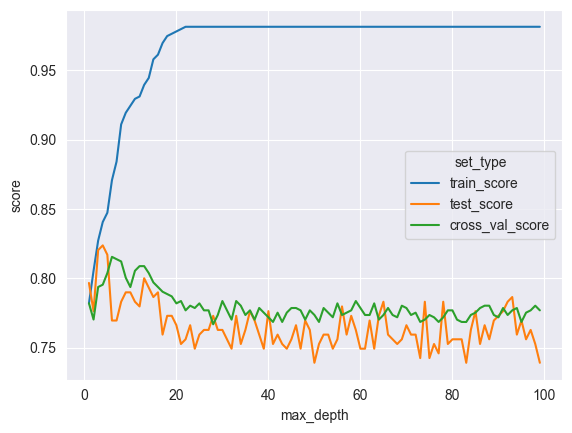

In [65]:
cross_val_scores_data_long = pd.melt(cross_val_scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')
sns.lineplot(x="max_depth", y="score", hue="set_type", data=cross_val_scores_data_long)
plt.show()

In [66]:
cross_val_scores_data_long.query("set_type == 'cross_val_score'").head(20)

max_depth         set_type     score
198          1  cross_val_score  0.781961
199          2  cross_val_score  0.770196
200          3  cross_val_score  0.793683
201          4  cross_val_score  0.795350
202          5  cross_val_score  0.803754
203          6  cross_val_score  0.815462
204          7  cross_val_score  0.813782
205          8  cross_val_score  0.812143
206          9  cross_val_score  0.800378
207         10  cross_val_score  0.793655
208         11  cross_val_score  0.805406
209         12  cross_val_score  0.808754
210         13  cross_val_score  0.808754
211         14  cross_val_score  0.803739
212         15  cross_val_score  0.797003
213         16  cross_val_score  0.793655
214         17  cross_val_score  0.790280
215         18  cross_val_score  0.788599
216         19  cross_val_score  0.786919
217         20  cross_val_score  0.781877

In [67]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7694915254237288

In [69]:
iris_train_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
iris_train_data.head()

sepal length  sepal width  petal length  petal width  species
130           7.4          2.8           6.1          1.9        2
7             5.0          3.4           1.5          0.2        0
11            4.8          3.4           1.6          0.2        0
142           5.8          2.7           5.1          1.9        2
109           7.2          3.6           6.1          2.5        2

In [76]:
X_train = iris_train_data.drop(['species'], axis=1)
X_train.head()

sepal length  sepal width  petal length  petal width
130           7.4          2.8           6.1          1.9
7             5.0          3.4           1.5          0.2
11            4.8          3.4           1.6          0.2
142           5.8          2.7           5.1          1.9
109           7.2          3.6           6.1          2.5

In [77]:
y_train = iris_train_data['species']
y_train.head()

130    2
7      0
11     0
142    2
109    2
Name: species, dtype: int64

In [79]:
iris_test_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)
iris_test_data.head()

sepal length  sepal width  petal length  petal width  species
114           5.8          2.8           5.1          2.4        2
70            5.9          3.2           4.8          1.8        1
138           6.0          3.0           4.8          1.8        2
59            5.2          2.7           3.9          1.4        1
44            5.1          3.8           1.9          0.4        0

In [80]:
X_test = iris_test_data.drop(['species'], axis=1)
X_test.head()

sepal length  sepal width  petal length  petal width
114           5.8          2.8           5.1          2.4
70            5.9          3.2           4.8          1.8
138           6.0          3.0           4.8          1.8
59            5.2          2.7           3.9          1.4
44            5.1          3.8           1.9          0.4

In [81]:
y_test = iris_test_data['species']
y_test.head()

114    2
70     1
138    2
59     1
44     0
Name: species, dtype: int64

In [88]:
rs = np.random.seed(0)

In [89]:
cross_val_scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    cross_val_scores_data = cross_val_scores_data.append(temp_score_data)

/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/3260271976.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_scores_data = cross_val_scores_data.append(temp_score_data)
/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/3260271976.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_scores_data = cross_val_scores_data.append(temp_score_data)
/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/3260271976.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_scores_data = cross_val_scores_data.append(temp_score_data)
/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_29387/3260271976.py:11: FutureWarning: The frame.append method is deprecated 

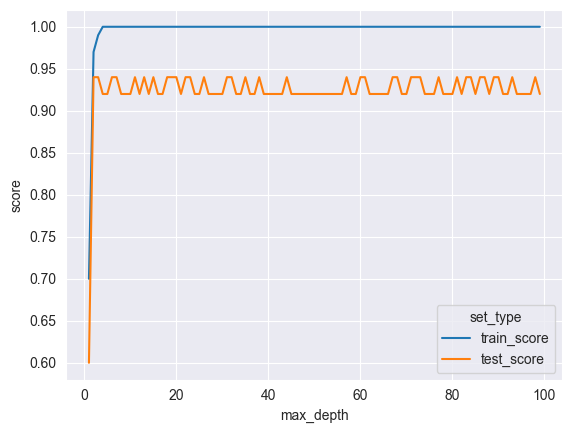

In [90]:
cross_val_scores_data_long = pd.melt(cross_val_scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')
sns.lineplot(x="max_depth", y="score", hue="set_type", data=cross_val_scores_data_long)
plt.show()

### Задача
Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

В задании допускается определённая погрешность.

P. S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения

In [91]:
data_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
data_train.head()

Длина  Высота  Шерстист  Гавкает  Лазает по деревьям      Вид
0     15    18.0         1        1                   0  собачка
1     20    24.0         1        0                   0  собачка
2     34    40.8         1        1                   0  собачка
3     26    31.2         1        1                   0  собачка
4     16    19.2         1        1                   0  собачка

In [106]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Длина               1000 non-null   int64  
 1   Высота              1000 non-null   float64
 2   Шерстист            1000 non-null   int64  
 3   Гавкает             1000 non-null   int64  
 4   Лазает по деревьям  1000 non-null   int64  
 5   Вид                 1000 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


In [93]:
X_train = data_train.drop(['Вид'], axis=1)
X_train.head()

Длина  Высота  Шерстист  Гавкает  Лазает по деревьям
0     15    18.0         1        1                   0
1     20    24.0         1        0                   0
2     34    40.8         1        1                   0
3     26    31.2         1        1                   0
4     16    19.2         1        1                   0

In [100]:
y_train = data_train['Вид']
y_train.head()

0    собачка
1    собачка
2    собачка
3    собачка
4    собачка
Name: Вид, dtype: object

In [101]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [102]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [103]:
clf.score(X_train, y_train)

1.0

In [110]:
y = pd.Series(clf.predict(X_train))

In [116]:
y.value_counts()

собачка    500
котик      500
dtype: int64

In [118]:
test_data = pd.read_json('/Users/mitya/Downloads/dataset_209691_15.txt')
test_data.head()

Длина  Высота  Шерстист  Гавкает  Лазает по деревьям
0     17    20.4         1        1                   0
1     34    40.8         1        1                   0
2     27    32.4         1        1                   0
3     29    34.8         1        1                   0
4     34    40.8         1        1                   0

In [120]:
X_test = test_data
X_test.head()

Длина  Высота  Шерстист  Гавкает  Лазает по деревьям
0     17    20.4         1        1                   0
1     34    40.8         1        1                   0
2     27    32.4         1        1                   0
3     29    34.8         1        1                   0
4     34    40.8         1        1                   0

In [121]:
y_test = pd.Series(clf.predict(X_test))

In [122]:
y_test.value_counts()

собачка    56
котик      44
dtype: int64

In [125]:
# Считать данные для обучения Дерева
dogs_n_cats = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
X_train = dogs_n_cats.drop('Вид', axis=1)
y_train = dogs_n_cats['Вид']

# Обучение Дерева
rs = np.random.seed(0)
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=rs, max_depth=5)
clf.fit(X_train, y_train)

# Результат обучения
clf.score(X_train, y_train)



# Считать тестовые данные
X_test = pd.read_json('/Users/mitya/Downloads/dataset_209691_15.txt')

# Предсказать результаты
y_pred = clf.predict(X_test)

# Подсчитать количество собачек
pd.Series(y_pred)[y_pred == 'собачка'].count()

56

### Precision, Recall, F1-score
Precision = TP / (TP + FP)  главное не ошибиться (не прихватить лишнее), FP — пометили неправильные, как правильные
Recall = TP / (TP + FN)  главное не пропустить нужное, FN — пропустили правильные, не все пометили
F1 = 2 * (Precision * Recall) / (Precision + Recall)

<img src='/Users/mitya/Desktop/Снимок экрана 2022-11-10 в 10.25.39.png'/>

### Задача
Поупражняемся в расчётах precision. В задании даны переменные, содержащие информацию о песнях и артистах - X_train, y_train, X_test и y_test. Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными и числовыми переменными, а текст это... текст. Поэтому его необходимо преобразовать в понятную для модели форму. В данном случае для каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.

Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', и сохраните результат в переменную precision.

Если он будет недостаточно высок, потюньте немного модель.

Исходные данные взяты отсюда, слегка процессированные можно взять здесь (исходные колонки типа жанра, года были выкинуты в задании)

In [129]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [127]:
music_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')
music_data.head()

song  year          artist    genre  \
0            the-ownerz  2007       gangstarr  Hip-Hop   
1  dead-sound-of-misery  2006  blind-guardian    Metal   
2         modred-s-song  2006  blind-guardian    Metal   
3        the-ninth-wave  2015  blind-guardian    Metal   
4                skills  2014       gangstarr  Hip-Hop   

                                              lyrics  length  commas  \
0  "One-two.."\n"One-two, shots to the chin.. kno...    1300      24   
1  It's dark\nLet's do it now\nBring in the siren...    1566       0   
2  I've lost my battle before it starts\nmy first...     996       1   
3  As dark night embraces\nWe are the nation\nI w...    2868       5   
4  Skills, skills, skills\n"My Microphone"\n"It's...    3351      22   

   exclamations  colons  hyphens  
0             5       0       11  
1             0       0        0  
2             0       1        0  
3             0       0        0  
4             0       0        3

In [128]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   song          360 non-null    object
 1   year          360 non-null    int64 
 2   artist        360 non-null    object
 3   genre         360 non-null    object
 4   lyrics        360 non-null    object
 5   length        360 non-null    int64 
 6   commas        360 non-null    int64 
 7   exclamations  360 non-null    int64 
 8   colons        360 non-null    int64 
 9   hyphens       360 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 28.2+ KB


In [131]:
X = music_data.drop(['song', 'artist', 'lyrics'], axis=1)

In [132]:
X = pd.get_dummies(X)
X.head()

year  length  commas  exclamations  colons  hyphens  genre_Hip-Hop  \
0  2007    1300      24             5       0       11              1   
1  2006    1566       0             0       0        0              0   
2  2006     996       1             0       1        0              0   
3  2015    2868       5             0       0        0              0   
4  2014    3351      22             0       0        3              1   

   genre_Metal  genre_Pop  
0            0          0  
1            1          0  
2            1          0  
3            1          0  
4            0          0

In [133]:
y = music_data['artist']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [148]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=rs, max_depth=2)

In [149]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [150]:
clf.score(X_train, y_train)

1.0

In [151]:
clf.score(X_test, y_test)

1.0

In [156]:
y_test

224              abba
42          gangstarr
285              abba
302              abba
56               abba
            ...      
79          gangstarr
163    blind-guardian
18     blind-guardian
301         gangstarr
104              abba
Name: artist, Length: 119, dtype: object

In [161]:
predictions = clf.predict(X_test)
y_pred = pd.concat([pd.Series(predictions), pd.Series(y)], axis=1)
y_pred

0          artist
0         abba       gangstarr
1    gangstarr  blind-guardian
2         abba  blind-guardian
3         abba  blind-guardian
4         abba       gangstarr
..         ...             ...
355        NaN            abba
356        NaN            abba
357        NaN            abba
358        NaN       gangstarr
359        NaN            abba

[360 rows x 2 columns]

In [165]:
precision = precision_score(y_test, predictions, average='micro')

In [166]:
precision

1.0

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
depth = 1
while True:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    precision = precision_score(y_test, predictions, average='micro')
    if precision > 0.78:
        break
    else:
        depth += 1

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
precision = precision_score(y_test, predictions, average='micro')

### ROC кривая, GridSearchCV, автоматический поиск оптимальных параметров
<a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'>GridSearchCV</a>

In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc

In [196]:
titanic_train_data = pd.read_csv('https://raw.githubusercontent.com/betelgeus/study/master/data/titanic/train.csv')
titanic_train_data.head()
X = titanic_train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = titanic_train_data['Survived']
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
rs = np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = rs)
clf = tree.DecisionTreeClassifier()

In [197]:
params={'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)}
# params={'criterion':['entropy'], 'max_depth': range(1, 30)}

In [198]:
# модуль GridSearchCV позволяет автоматически подобрать оптимальные параметры модели
# параметры: классификатор, набор параметров, которые будут сравниваться, параметры кросс-валидации, в нашем случае 5 фолдов
grid_search_cv_clf=GridSearchCV(clf, params, cv=5)

In [199]:
# по сути повторили ручной подбор оптимальных параметров, который делали ранее.
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [200]:
# выводим оптимальные параметры
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [201]:
# сохраняем оптимальные параметры
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(max_depth=5)

In [202]:
# смотрим итоговый score
best_clf.score(X_test, y_test)

0.8212290502793296

In [203]:
# предсказываем значение зависимой переменной
y_pred = best_clf.predict(X_test)

In [204]:
# проверяем Precision
precision_score(y_test, y_pred)

0.8135593220338984

In [205]:
# проверяем Recall
recall_score(y_test, y_pred)

0.6956521739130435

In [206]:
# Попробовав разные параметры можно добиться необходимых нам значений Precision и Recall для решения конкретной бизнес задачи.

In [209]:
# каковы вероятности исходов
y_pred_prob = best_clf.predict_proba(X_test)
y_pred_prob

array([[0.88724036, 0.11275964],
       [0.88724036, 0.11275964],
       [1.        , 0.        ],
       [0.03125   , 0.96875   ],
       [0.44897959, 0.55102041],
       [0.58571429, 0.41428571],
       [0.03125   , 0.96875   ],
       [0.03125   , 0.96875   ],
       [0.58571429, 0.41428571],
       [0.15625   , 0.84375   ],
       [0.88724036, 0.11275964],
       [0.03125   , 0.96875   ],
       [0.88724036, 0.11275964],
       [0.03125   , 0.96875   ],
       [0.03125   , 0.96875   ],
       [0.15625   , 0.84375   ],
       [0.88724036, 0.11275964],
       [0.88724036, 0.11275964],
       [0.88724036, 0.11275964],
       [0.        , 1.        ],
       [0.88724036, 0.11275964],
       [0.03125   , 0.96875   ],
       [0.88724036, 0.11275964],
       [0.58571429, 0.41428571],
       [0.44897959, 0.55102041],
       [0.03125   , 0.96875   ],
       [0.88724036, 0.11275964],
       [0.15625   , 0.84375   ],
       [0.03125   , 0.96875   ],
       [0.5       , 0.5       ],
       [0.

In [210]:
# по умолчанию классификатор относит наблюдение к тому или иному исходу по отсечке в 0.5, но мы можем тюнить этот порог для достижения
# необходимых показателей Precision и Recall

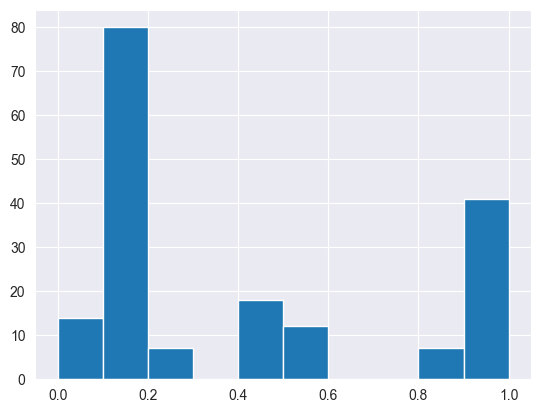

In [214]:
# Посмотрим как распределились вероятности. Мы видим, что есть группа меджу 0.4 и 0.6, которую
# мы можем отнести к выжившим или умершим в зависимости от того, что для нас важнее Precision или Recall.
pd.Series(y_pred_prob[:, 1]).hist()
plt.show()

In [216]:
y_pred_v2 = np.where(y_pred_prob[:, 1] > 0.8, 1, 0)

In [217]:
precision_score(y_test, y_pred_v2)

0.8958333333333334

In [218]:
recall_score(y_test, y_pred_v2)

0.6231884057971014

In [219]:
y_pred_v3 = np.where(y_pred_prob[:, 1] > 0.2, 1, 0)

In [220]:
precision_score(y_test, y_pred_v3)

0.7435897435897436

In [221]:
recall_score(y_test, y_pred_v3)

0.8405797101449275

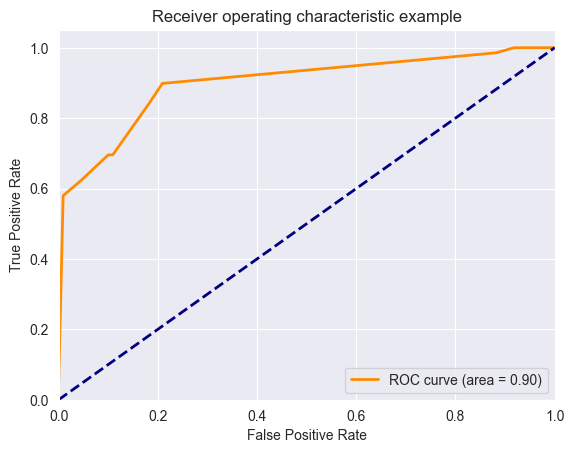

In [223]:
lw = 2
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''
1) ROC-кривая позволяет отобразить на одном графике результаты большого числа матриц ошибок (confusion matrix) в зависимости от различного уровня порога отсечения бинарных классов (хотя дерево решений может использоваться и для небинарной классификации)
2) ось y - TPR(=Recall=Полнота или Чувствительность=TP/(TP+FN)), на ось x может быть выведен или FPR=1-Specificity=1-TN/(TN+FP), или Precision=TP/(TP+FP) - тот или иной показатель используется в зависимости от отсутствия или наличия дисбаланса классов.
3) AUC = area under the curve = интегральный показатель площади под кривой [0;1], AUC=0,5 - дерево не лучше случайного распределения
'''

/Users/mitya/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


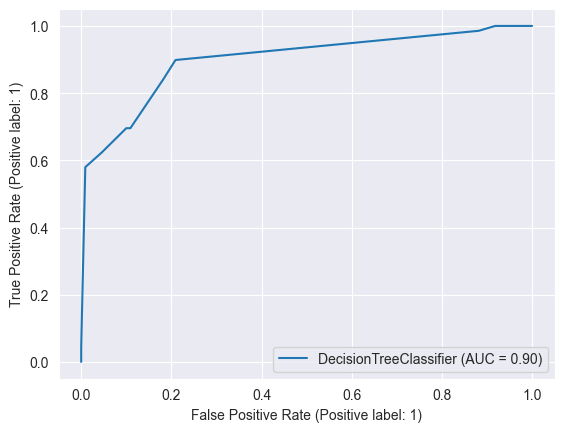

In [226]:
from sklearn import metrics
metrics.plot_roc_curve(best_clf, X_test, y_test)
plt.show()

### Задача
Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

В ответе необходимо указать число с точностью 3 знака после запятой.

In [227]:
heart_diseas_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
heart_diseas_df.head()

sex  exang  num
0    1      1    1
1    1      1    1
2    1      0    1
3    1      0    0
4    1      0    1

In [229]:
X_train = heart_diseas_df.drop(['num'], axis=1)

In [230]:
y_train = heart_diseas_df['num']

In [231]:
clf = DecisionTreeClassifier(criterion='entropy')

In [232]:
heart_diseas_fit = clf.fit(X_train, y_train)

In [235]:
clf.score(X_train, y_train)

0.7016806722689075

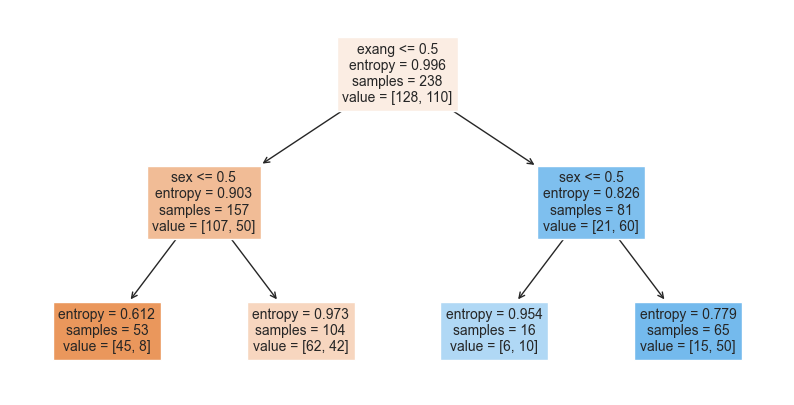

In [236]:
plt.figure(figsize=(10, 5))
tree.plot_tree(clf, fontsize=10, feature_names=list(X_train), filled=True)
plt.show()

In [252]:
l_node = clf.tree_.children_left[0]
r_node = clf.tree_.children_right[0]
n1 = clf.tree_.n_node_samples[l_node]
n2 = clf.tree_.n_node_samples[r_node]
e1 = clf.tree_.impurity[l_node]
e2 = clf.tree_.impurity[r_node]
n = n1 + n2

ig = 0.996 - (n1 * e1 + n2 * e2) / n

In [260]:
print('IG = E - (n1/N * E1 + n2/N * E1)')
print('n1:', n1)
print('n2:', n2)
print('e1:', e1)
print('e2:', e2)
print(round(ig, 4))

IG = E - (n1/N * E1 + n2/N * E1)
n1: 157
n2: 81
e1: 0.9027113410339267
e2: 0.8256265261578954
0.1195


### Задача
Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!

Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [263]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 37)

In [265]:
dt = DecisionTreeClassifier()

In [266]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [267]:
predicted = dt.predict(X_test)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

dt = DecisionTreeClassifier(criterion='entropy')
predicted = dt.fit(X_train,y_train).predict(X_test)

<img src='/Users/mitya/Desktop/Снимок экрана 2022-11-10 в 14.23.37.png'/>

### Задача
Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.
Это применимо не только к деревьям, но и к другим моделям sklearn.

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [269]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

In [270]:
clf = DecisionTreeClassifier()

In [273]:
params={'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11)}
search=GridSearchCV(clf, params)
search.fit(X, y)
best_tree = search.best_estimator_

In [274]:
best_tree

DecisionTreeClassifier(max_depth=3)

In [277]:
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

### Задача
Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

Здесь можно посмотреть на сравнение этих поисков.

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [280]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

In [281]:
clf = DecisionTreeClassifier()

In [282]:
params={'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11)}
search=RandomizedSearchCV(clf, params)
search.fit(X, y)
best_tree = search.best_estimator_

In [283]:
best_tree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4)

### Задача
Воспользуемся изученными приёмами и попредсказываем!
Даны 2 датасэта, к которым вы можете обращаться:

- train - размеченный с известными правильным ответами (хранятся в колонке y)
- test - набор, где нужно предсказать их

Найдите дерево с наиболее подходящими параметрами с помощью GridSearchCV и предскажите с его помощью ответы ко 2-ому сэту! Границы параметров как раньше:

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Названия переменных тоже:лучшее дерево - best_tree, GridSearchCV - search, а предсказания - predictions

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train = train.drop(['y'], axis=1)
y_train = train['y']
x_test = test
clf = DecisionTreeClassifier()
params={'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11)}
search=GridSearchCV(clf, params)
search.fit(X_train, y_train)
best_tree = search.best_estimator_
predictions = best_tree.predict(x_test)